<h1 style="background-color: #0D0C1D; border-radius: 8px; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; font-size: 48px; font-weight: bold; padding: 15px; text-align: center;">Practical Application Assignment III: Comparing Classifiers</h1>

<div style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>Table of Contents</b></h2>
    <ul>
        <li><a href="#overview">Overview</a></li>
        <li><a href="#getting-started">Getting Started</a></li>
        <li><a href="#problem-1">Problem 1: Understanding the Data</a></li>
        <ul>
            <li><a href="#data-exploration">Data Exploration</a></li>
            <li><a href="#data-quality-assessment">Data Quality Assessment</a></li>
            <li><a href="#data-visualization">Data Visualization</a></li>
        </ul>
        <li><a href="#problem-2">Problem 2: Read in the Data</a></li>
        <li><a href="#problem-3">Problem 3: Understanding the Features</a></li>
        <li><a href="#problem-4">Problem 4: Understanding the Task</a></li>
        <li><a href="#problem-5">Problem 5: Engineering Features</a></li>
        <li><a href="#problem-6">Problem 6: Train/Test Split</a></li>
        <li><a href="#problem-7">Problem 7: A Baseline Model</a></li>
        <li><a href="#problem-8">Problem 8: A Simple Model</a></li>
        <li><a href="#problem-9">Problem 9: Score the Model</a></li>
        <li><a href="#problem-10">Problem 10: Model Comparisons</a></li>
        <li><a href="#problem-11">Problem 11: Improving the Model</a></li>
    </ul>
</div>

<div id="overview" style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>Overview</b></h2>
    <p>In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines. We will utilize a dataset related to marketing bank products over the telephone.</p>
</div>

<div id="getting-started" style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>Getting Started</b></h2>
    <p>Our dataset comes from the <a href='https://archive.ics.uci.edu/dataset/222/bank+marketing'>UCI Machine Learning repository</a>. The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns. We will make use of the article accompanying the dataset <a href='./references/CRISP-DM-Bank.pdf'>here</a> for more information on the data and features.</p>
</div>

##
<div id="problem-1" style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>Problem 1: Understanding the Data</b></h2>
    <p>To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the <b>Materials and Methods</b> section of the paper. How many marketing campaigns does this data represent?</p>
</div>

<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <p>The data presented in the "Materials and Methods" section of the paper represents multiple marketing campaigns conducted by a Portuguese retail bank from May 2008 to June 2013, encompassing a total of 52,944 phone contacts. However, the specific number of individual campaigns within this period is not explicitly mentioned. Instead, the section describes the overall methodology and data analysis for the telemarketing efforts over the five-year period.</p>
</div>

##
<div id="problem-2" style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>Problem 2: Read in the Data</b></h2>
    <p>Use pandas to read in the dataset <code>bank-additional-full.csv</code> and assign to a meaningful variable name.</p>
</div>

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data/bank-additional-full.csv', sep=';')

###
<div id="data-exploration" style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>Data Exploration</b></h3>
</div>

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# List all the features
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
# Dropping the 'duration' column as this has been recommended by the researchers
data = data.drop('duration', axis=1)

In [6]:
# Let's create more descriptive column names and clean them up
column_names = ['Age', 'Job', 'MaritalStatus', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Month', 'DayOfWeek', 'Campaign', 'DaysSinceLastContact', 'PreviousContacts', 'OutcomeOfPreviousCampaign', 'EmploymentVariationRate', 'ConsumerPriceIndex', 'ConsumerConfidenceIndex', 'EuriborThreeMonthRate', 'NumberOfEmployees', 'Subscribed']
data.columns = column_names

In [7]:
data.head()

,Age,Job,MaritalStatus,Education,Default,Housing,Loan,Contact,Month,DayOfWeek,Campaign,DaysSinceLastContact,PreviousContacts,OutcomeOfPreviousCampaign,EmploymentVariationRate,ConsumerPriceIndex,ConsumerConfidenceIndex,EuriborThreeMonthRate,NumberOfEmployees,Subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        41188 non-null  int64  
 1   Job                        41188 non-null  object 
 2   MaritalStatus              41188 non-null  object 
 3   Education                  41188 non-null  object 
 4   Default                    41188 non-null  object 
 5   Housing                    41188 non-null  object 
 6   Loan                       41188 non-null  object 
 7   Contact                    41188 non-null  object 
 8   Month                      41188 non-null  object 
 9   DayOfWeek                  41188 non-null  object 
 10  Campaign                   41188 non-null  int64  
 11  DaysSinceLastContact       41188 non-null  int64  
 12  PreviousContacts           41188 non-null  int64  
 13  OutcomeOfPreviousCampaign  41188 non-null  obj

In [9]:
# Display the summary statistics of the dataset
data.describe()

,Age,Campaign,DaysSinceLastContact,PreviousContacts,EmploymentVariationRate,ConsumerPriceIndex,ConsumerConfidenceIndex,EuriborThreeMonthRate,NumberOfEmployees
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
# Get categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Get numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the categorical and numerical features
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['Job', 'MaritalStatus', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Month', 'DayOfWeek', 'OutcomeOfPreviousCampaign', 'Subscribed']
Numerical Features: ['Age', 'Campaign', 'DaysSinceLastContact', 'PreviousContacts', 'EmploymentVariationRate', 'ConsumerPriceIndex', 'ConsumerConfidenceIndex', 'EuriborThreeMonthRate', 'NumberOfEmployees']


In [11]:
# Get the number of unique values in the categorical features
for feature in categorical_features:
    print(f"Number of Unique Values in {feature}: {data[feature].nunique()}")

Number of Unique Values in Job: 12
Number of Unique Values in MaritalStatus: 4
Number of Unique Values in Education: 8
Number of Unique Values in Default: 3
Number of Unique Values in Housing: 3
Number of Unique Values in Loan: 3
Number of Unique Values in Contact: 2
Number of Unique Values in Month: 10
Number of Unique Values in DayOfWeek: 5
Number of Unique Values in OutcomeOfPreviousCampaign: 3
Number of Unique Values in Subscribed: 2


In [12]:
# Get the unique values of the categorical features
for feature in categorical_features:
    print(f"Unique Values in {feature}: {data[feature].unique()}")
    print("")

Unique Values in Job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique Values in MaritalStatus: ['married' 'single' 'divorced' 'unknown']

Unique Values in Education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique Values in Default: ['no' 'unknown' 'yes']

Unique Values in Housing: ['no' 'yes' 'unknown']

Unique Values in Loan: ['no' 'yes' 'unknown']

Unique Values in Contact: ['telephone' 'cellular']

Unique Values in Month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Unique Values in DayOfWeek: ['mon' 'tue' 'wed' 'thu' 'fri']

Unique Values in OutcomeOfPreviousCampaign: ['nonexistent' 'failure' 'success']

Unique Values in Subscribed: ['no' 'yes']



In [13]:
# Let's try to clean up the data a bit

# Replace '.' with ' ' in all columns
for feature in categorical_features:
    data[feature] = data[feature].str.replace('.', ' ')

# Convert all values to title case
for feature in categorical_features:
    data[feature] = data[feature].str.title()

# Verify
for feature in categorical_features:
    print(f"Unique Values in {feature}: {data[feature].unique()}")
    print("")

Unique Values in Job: ['Housemaid' 'Services' 'Admin ' 'Blue-Collar' 'Technician' 'Retired'
 'Management' 'Unemployed' 'Self-Employed' 'Unknown' 'Entrepreneur'
 'Student']

Unique Values in MaritalStatus: ['Married' 'Single' 'Divorced' 'Unknown']

Unique Values in Education: ['Basic 4Y' 'High School' 'Basic 6Y' 'Basic 9Y' 'Professional Course'
 'Unknown' 'University Degree' 'Illiterate']

Unique Values in Default: ['No' 'Unknown' 'Yes']

Unique Values in Housing: ['No' 'Yes' 'Unknown']

Unique Values in Loan: ['No' 'Yes' 'Unknown']

Unique Values in Contact: ['Telephone' 'Cellular']

Unique Values in Month: ['May' 'Jun' 'Jul' 'Aug' 'Oct' 'Nov' 'Dec' 'Mar' 'Apr' 'Sep']

Unique Values in DayOfWeek: ['Mon' 'Tue' 'Wed' 'Thu' 'Fri']

Unique Values in OutcomeOfPreviousCampaign: ['Nonexistent' 'Failure' 'Success']

Unique Values in Subscribed: ['No' 'Yes']



In [14]:
# Some replacements

# Replace 'Admin ' with 'Admin' in the 'Job' column
data['Job'] = data['Job'].replace({'Admin ': 'Admin'})

# Replace 'May' 'Jun' 'Jul' 'Aug' 'Oct' 'Nov' 'Dec' 'Mar' 'Apr' 'Sep' with full month names in the 'Month' column
data['Month'] = data['Month'].replace({'May': 'May', 'Jun': 'June', 'Jul': 'July', 'Aug': 'August', 'Oct': 'October', 'Nov': 'November', 'Dec': 'December', 'Mar': 'March', 'Apr': 'April', 'Sep': 'September'})

# Replace 'Mon' 'Tue' 'Wed' 'Thu' 'Fri' with full day names in the 'DayOfWeek' column
data['DayOfWeek'] = data['DayOfWeek'].replace({'Mon': 'Monday', 'Tue': 'Tuesday', 'Wed': 'Wednesday', 'Thu': 'Thursday', 'Fri': 'Friday'})

# Verify
for feature in categorical_features:
    print(f"Unique Values in {feature}: {data[feature].unique()}")
    print("")

Unique Values in Job: ['Housemaid' 'Services' 'Admin' 'Blue-Collar' 'Technician' 'Retired'
 'Management' 'Unemployed' 'Self-Employed' 'Unknown' 'Entrepreneur'
 'Student']

Unique Values in MaritalStatus: ['Married' 'Single' 'Divorced' 'Unknown']

Unique Values in Education: ['Basic 4Y' 'High School' 'Basic 6Y' 'Basic 9Y' 'Professional Course'
 'Unknown' 'University Degree' 'Illiterate']

Unique Values in Default: ['No' 'Unknown' 'Yes']

Unique Values in Housing: ['No' 'Yes' 'Unknown']

Unique Values in Loan: ['No' 'Yes' 'Unknown']

Unique Values in Contact: ['Telephone' 'Cellular']

Unique Values in Month: ['May' 'June' 'July' 'August' 'October' 'November' 'December' 'March'
 'April' 'September']

Unique Values in DayOfWeek: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']

Unique Values in OutcomeOfPreviousCampaign: ['Nonexistent' 'Failure' 'Success']

Unique Values in Subscribed: ['No' 'Yes']



In [15]:
# Save cleaned data to a new CSV file
data.to_csv('data/bank-additional-full-cleaned-01.csv', index=False)

###
<div id="data-quality-assessment" style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>Data Quality Assessment</b></h3>
</div>

In [16]:
# Find number of missing values in each column
data.isnull().sum()

Age                          0
Job                          0
MaritalStatus                0
Education                    0
Default                      0
Housing                      0
Loan                         0
Contact                      0
Month                        0
DayOfWeek                    0
Campaign                     0
DaysSinceLastContact         0
PreviousContacts             0
OutcomeOfPreviousCampaign    0
EmploymentVariationRate      0
ConsumerPriceIndex           0
ConsumerConfidenceIndex      0
EuriborThreeMonthRate        0
NumberOfEmployees            0
Subscribed                   0
dtype: int64

<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h4><b>Analysis</b></h4>
    <ul>
        <li>No missing values, so missing values don't need to be handled.</li>
    </ul>
</div>

In [17]:
# Number of rows in the dataset
print("Number of Rows in the Dataset:", data.shape[0])

Number of Rows in the Dataset: 41188


In [18]:
# Number of duplicate rows in the dataset
print("Number of Duplicate Rows in the Dataset:", data.duplicated().sum())

Number of Duplicate Rows in the Dataset: 1784


In [19]:
# Sine there are only 1,784 duplicate rows out of 41,188 rows (4.33%), we can just drop them
data = data.drop_duplicates()

# Verify
print("Number of Rows in the Dataset:", data.shape[0])

Number of Rows in the Dataset: 39404


In [20]:
# Examining the balance of the target variable ('Subscribed')
data['Subscribed'].value_counts()

Subscribed
No     34806
Yes     4598
Name: count, dtype: int64

In [21]:
# Convert to percentages
data['Subscribed'].value_counts(normalize=True) * 100

Subscribed
No     88.331134
Yes    11.668866
Name: proportion, dtype: float64

###
<div id="data-visualization" style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h3><b>Data Visualization</b></h3>
</div>

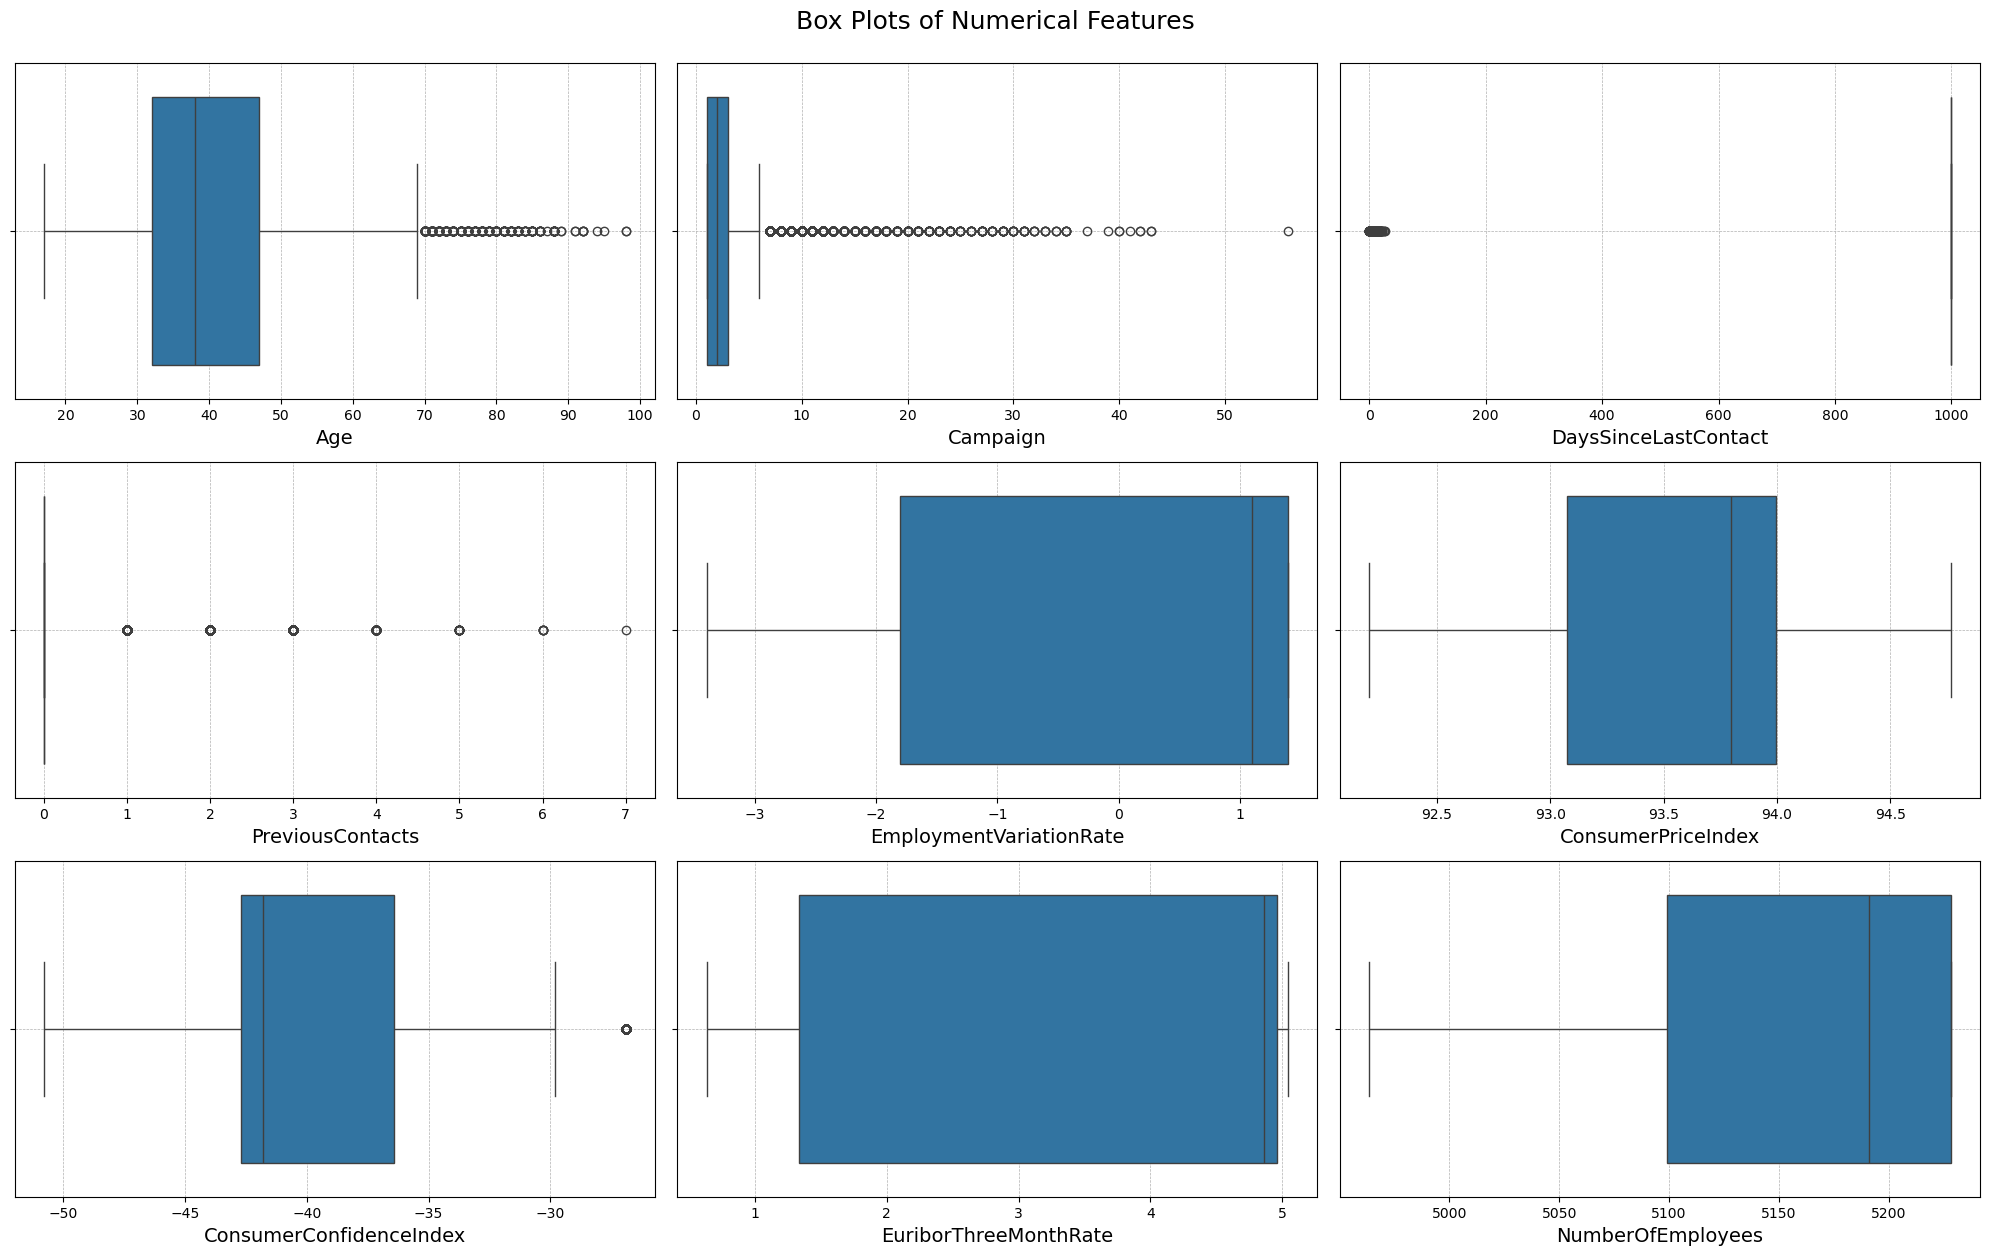

In [22]:
# Box plots for numerical features
plt.figure(figsize=(20, 20))
plt.suptitle("Box Plots of Numerical Features", fontsize=18, y=1.0)
for col in range(len(numerical_features)):
    plt.subplot(5, 3, col+1)
    sns.boxplot(x=data[numerical_features[col]])
    plt.xlabel(numerical_features[col], fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('images/01-box-plots.png', bbox_inches='tight', dpi=300)
plt.show()

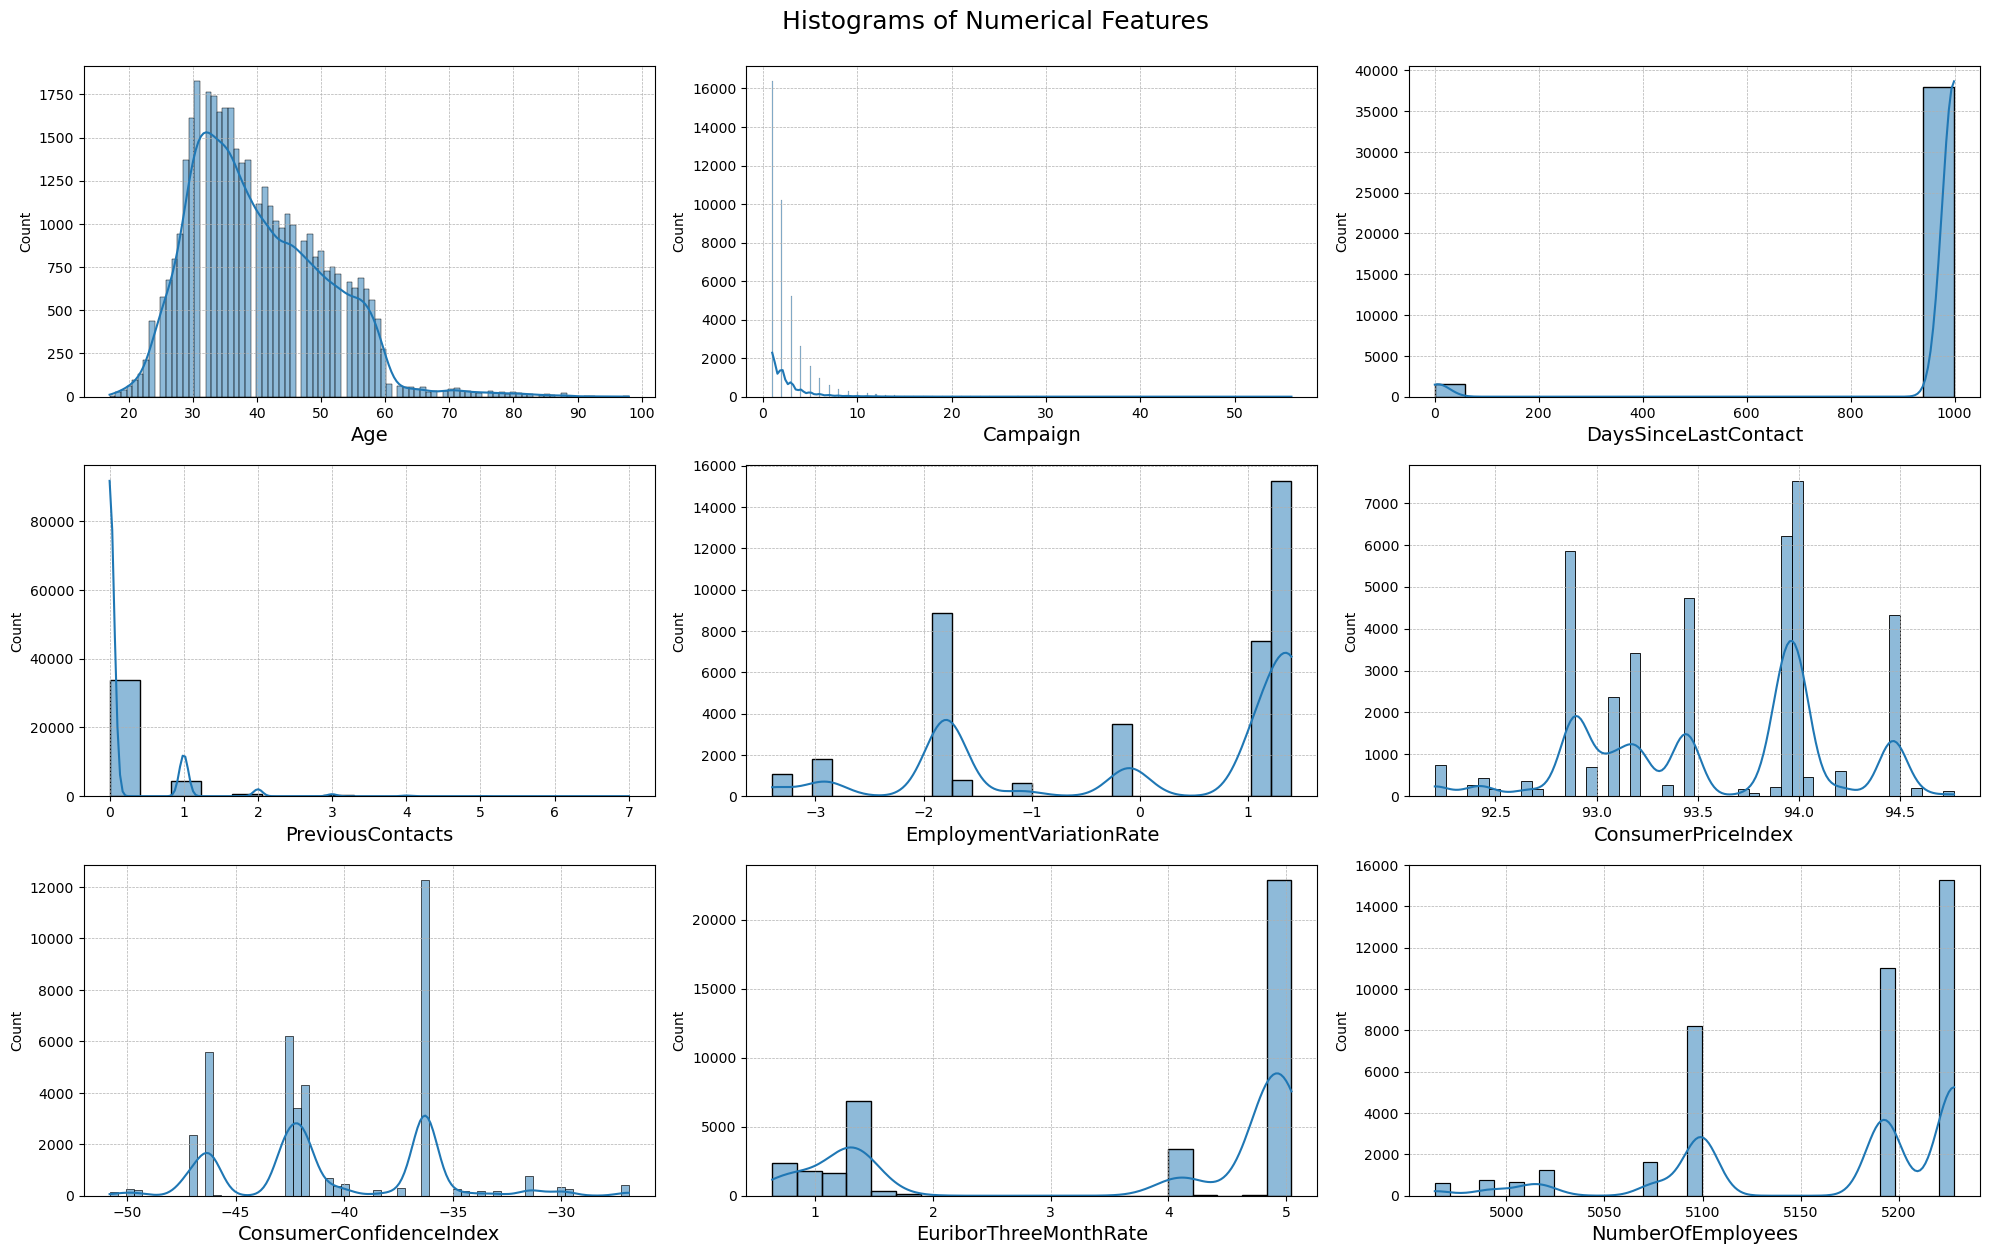

In [23]:
# Histograms of numerical features
plt.figure(figsize=(20, 20))
plt.suptitle("Histograms of Numerical Features", fontsize=18, y=1.0)
for col in range(len(numerical_features)):
    plt.subplot(5, 3, col+1)
    sns.histplot(x=data[numerical_features[col]], kde=True)
    plt.xlabel(numerical_features[col], fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('images/02-histograms.png', bbox_inches='tight', dpi=300)
plt.show()

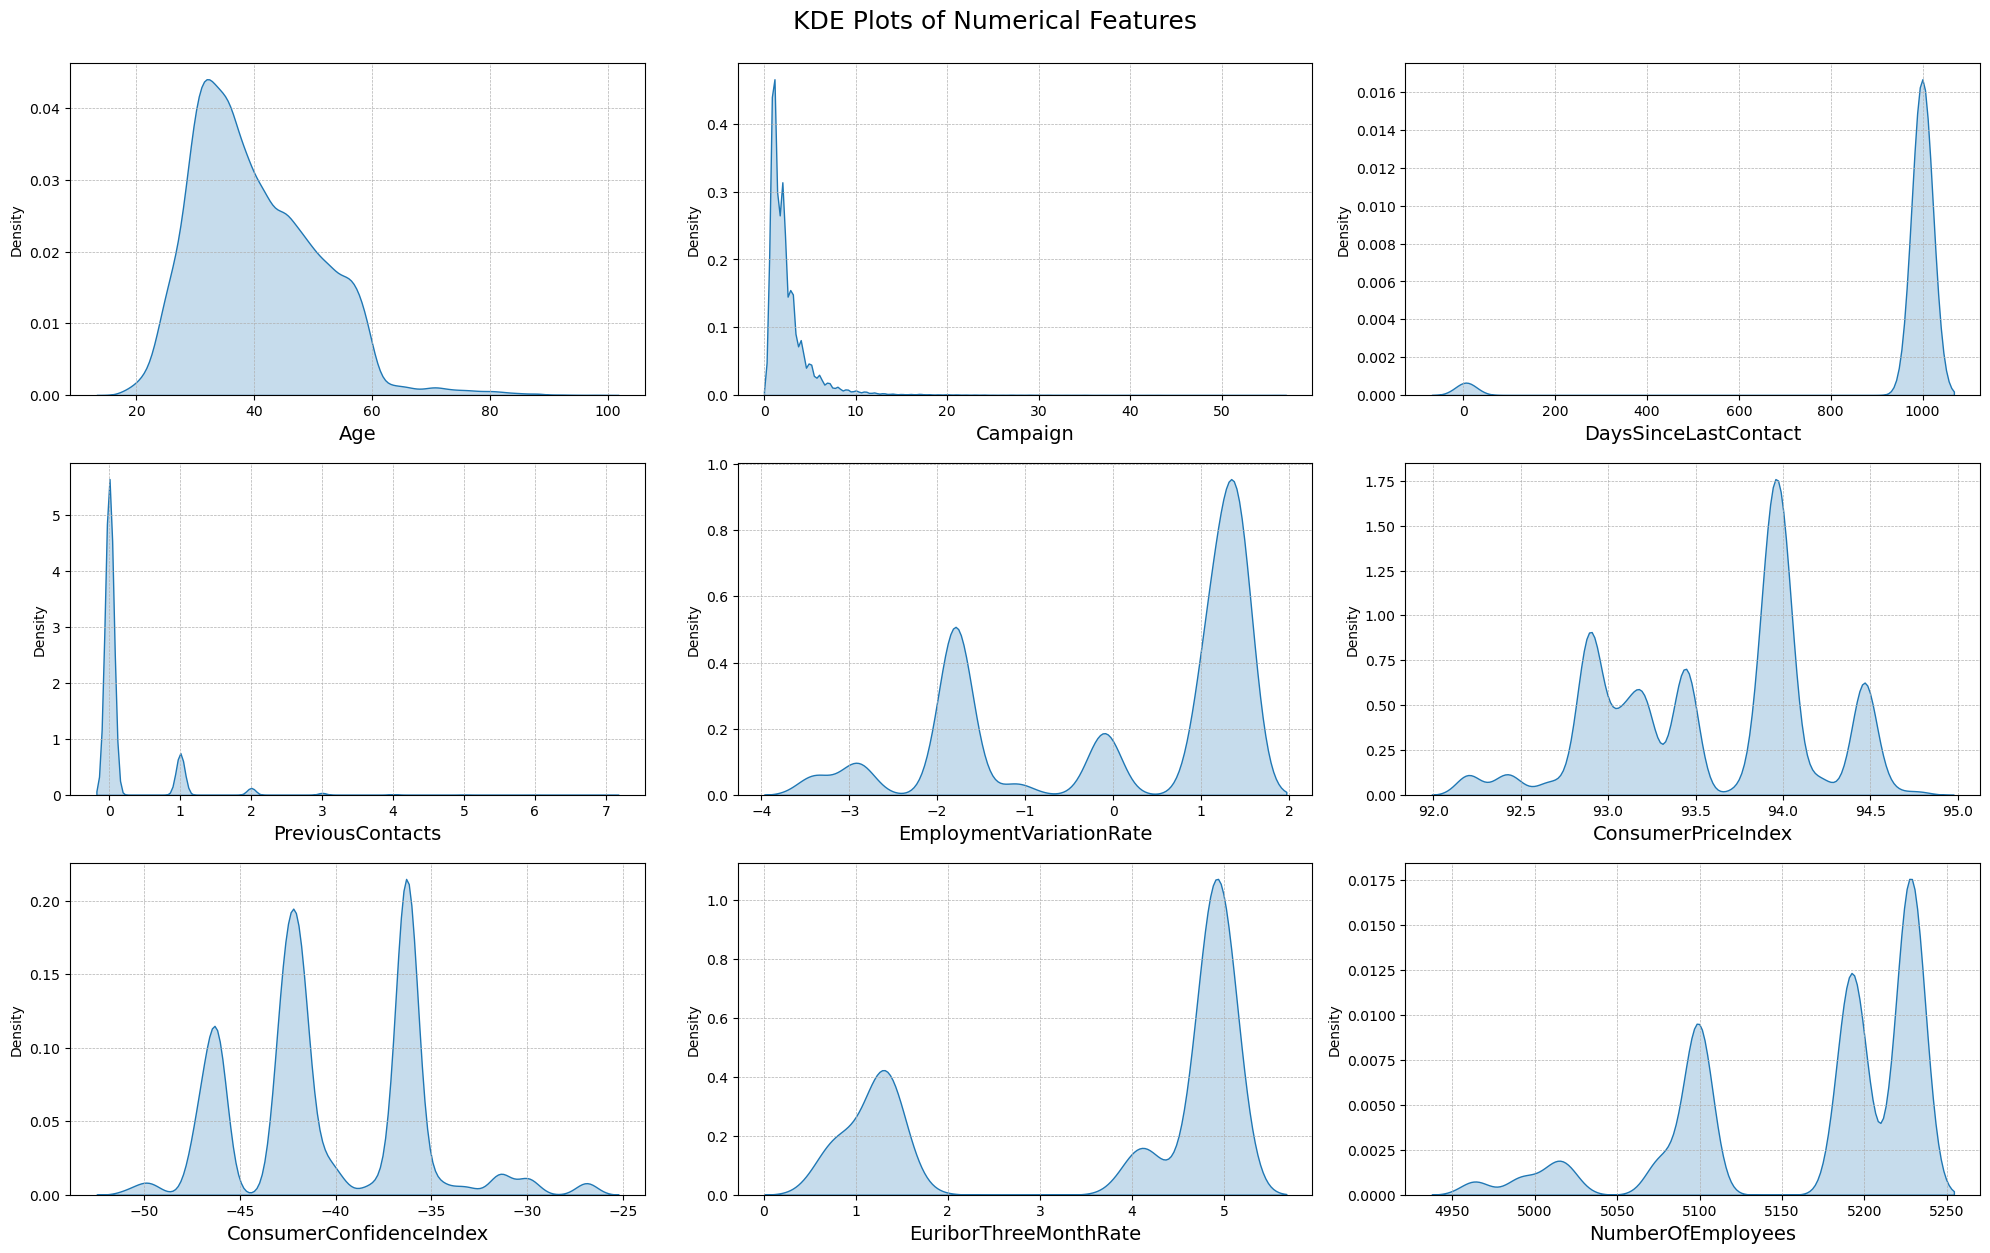

In [24]:
# KDE plots of numerical features
plt.figure(figsize=(20, 20))
plt.suptitle("KDE Plots of Numerical Features", fontsize=18, y=1.0)
for col in range(len(numerical_features)):
    plt.subplot(5, 3, col+1)
    sns.kdeplot(x=data[numerical_features[col]], shade=True)
    plt.xlabel(numerical_features[col], fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('images/03-kde-plots.png', bbox_inches='tight', dpi=300)
plt.show()

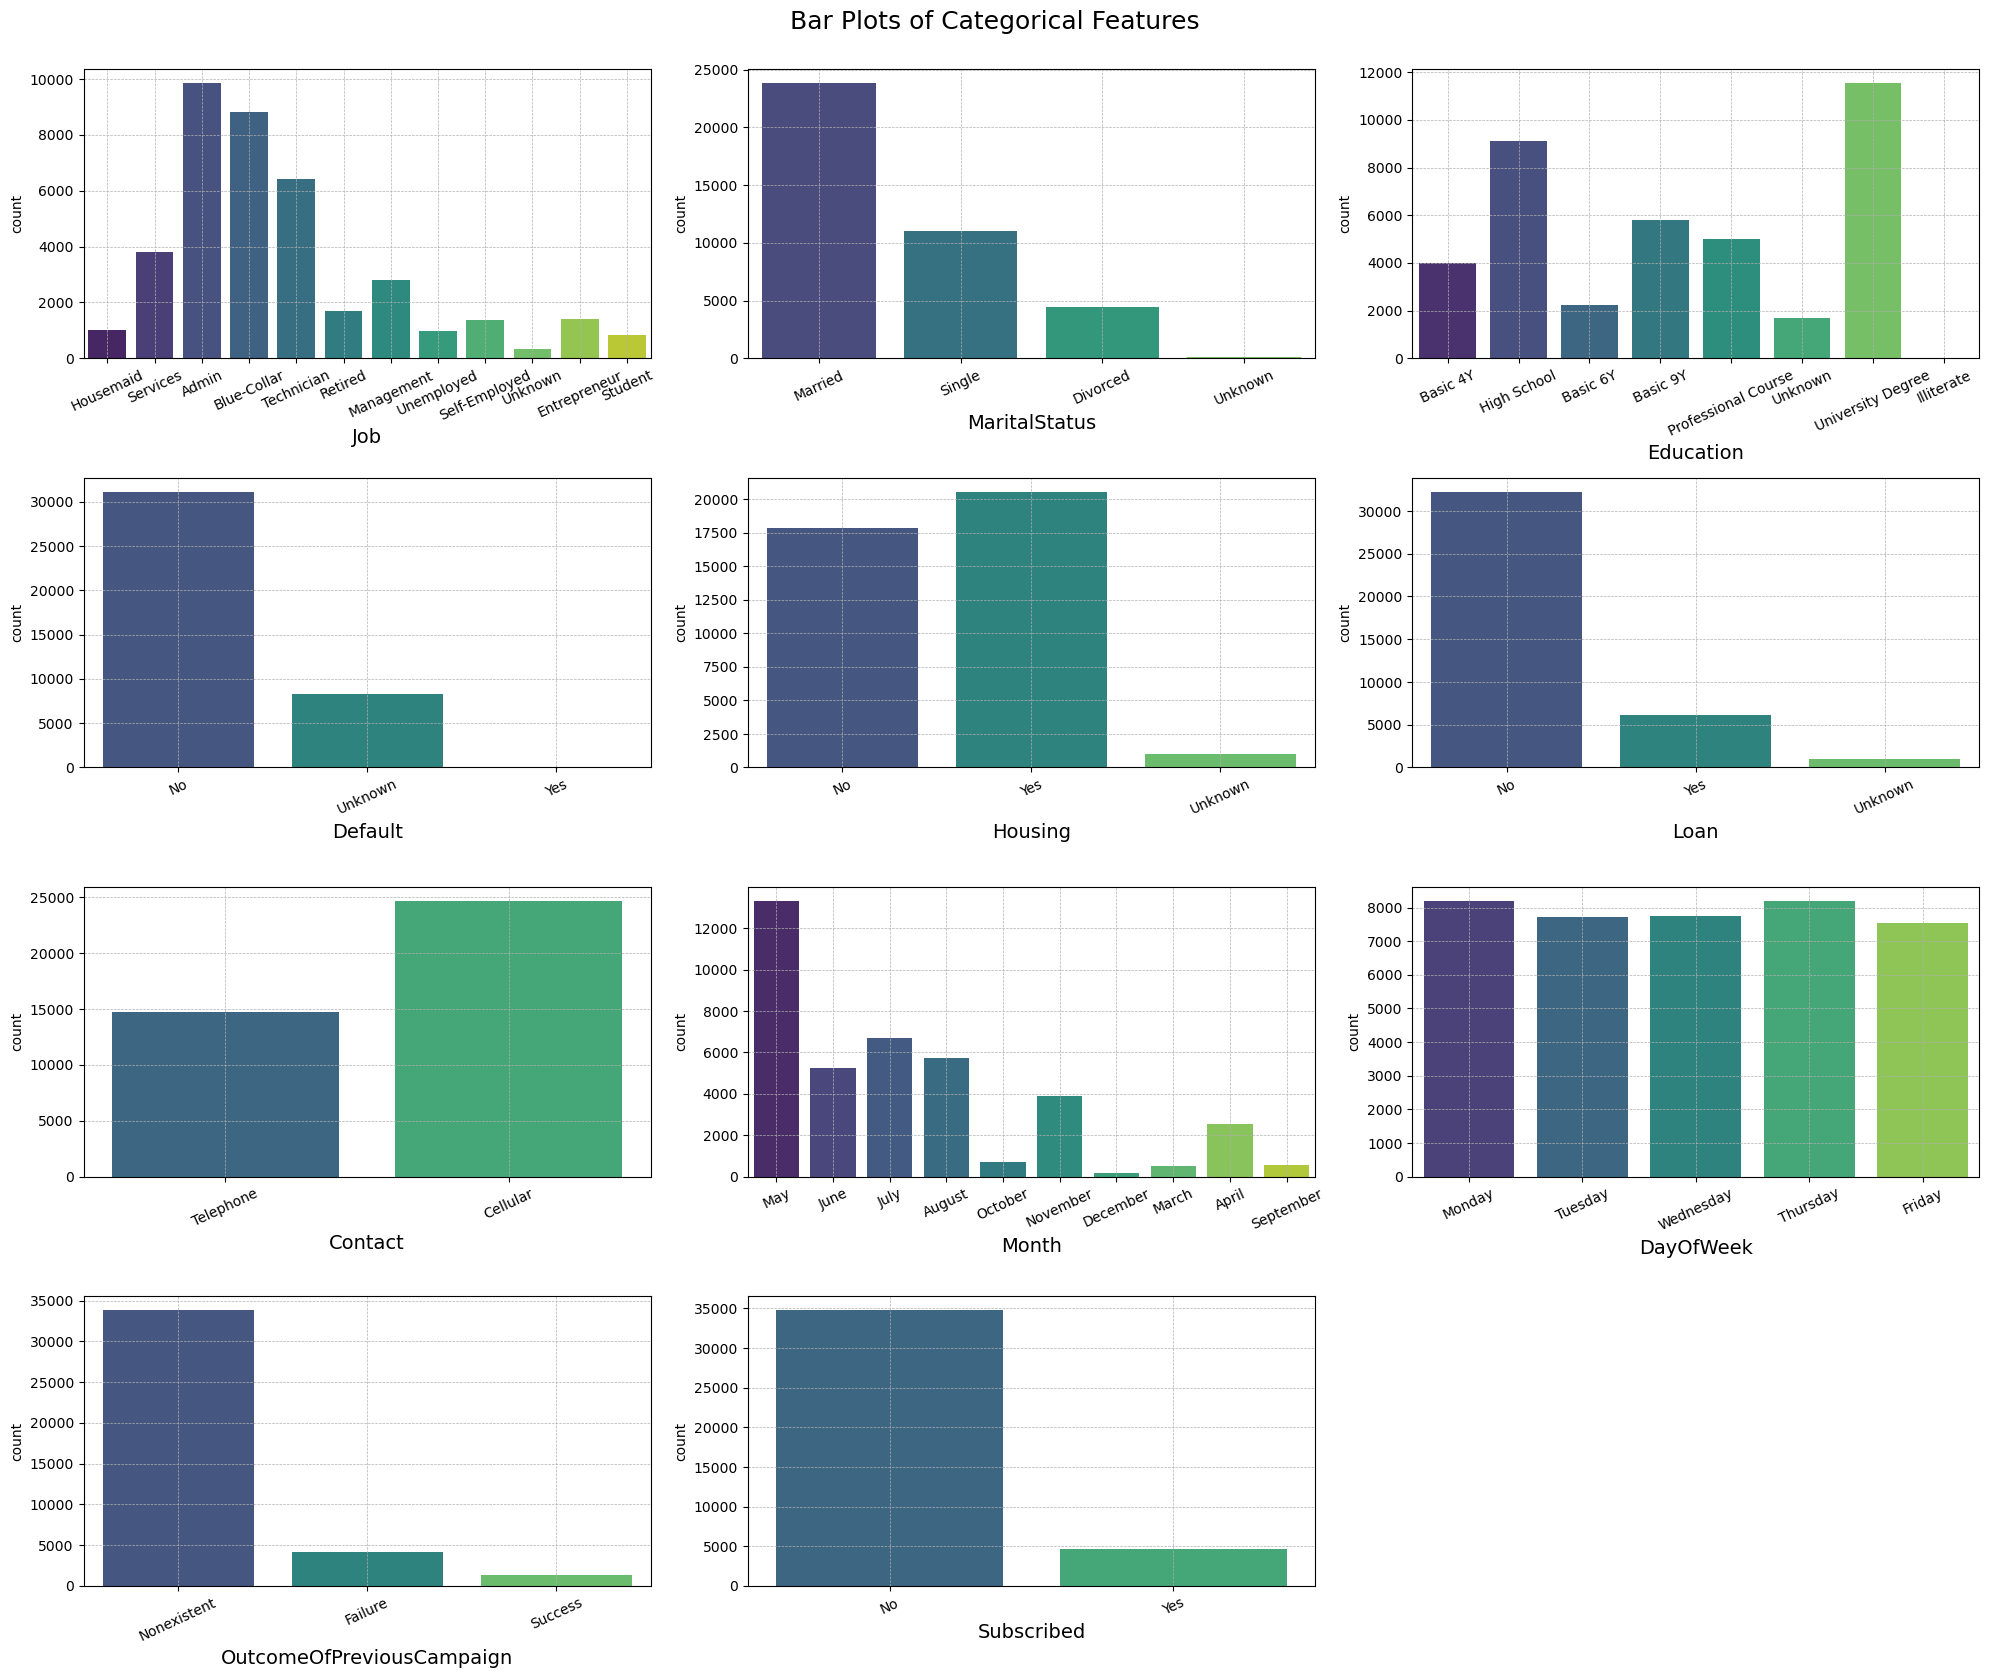

In [25]:
# Bar plots of categorical features
plt.figure(figsize=(20, 20))
plt.suptitle("Bar Plots of Categorical Features", fontsize=18, y=1.0)
for col in range(len(categorical_features)):
    plt.subplot(5, 3, col+1)
    sns.countplot(x=data[categorical_features[col]], palette='viridis')
    plt.xlabel(categorical_features[col], fontsize=14)
    plt.xticks(rotation=25)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('images/04-bar-plots.png', bbox_inches='tight', dpi=300)
plt.show()

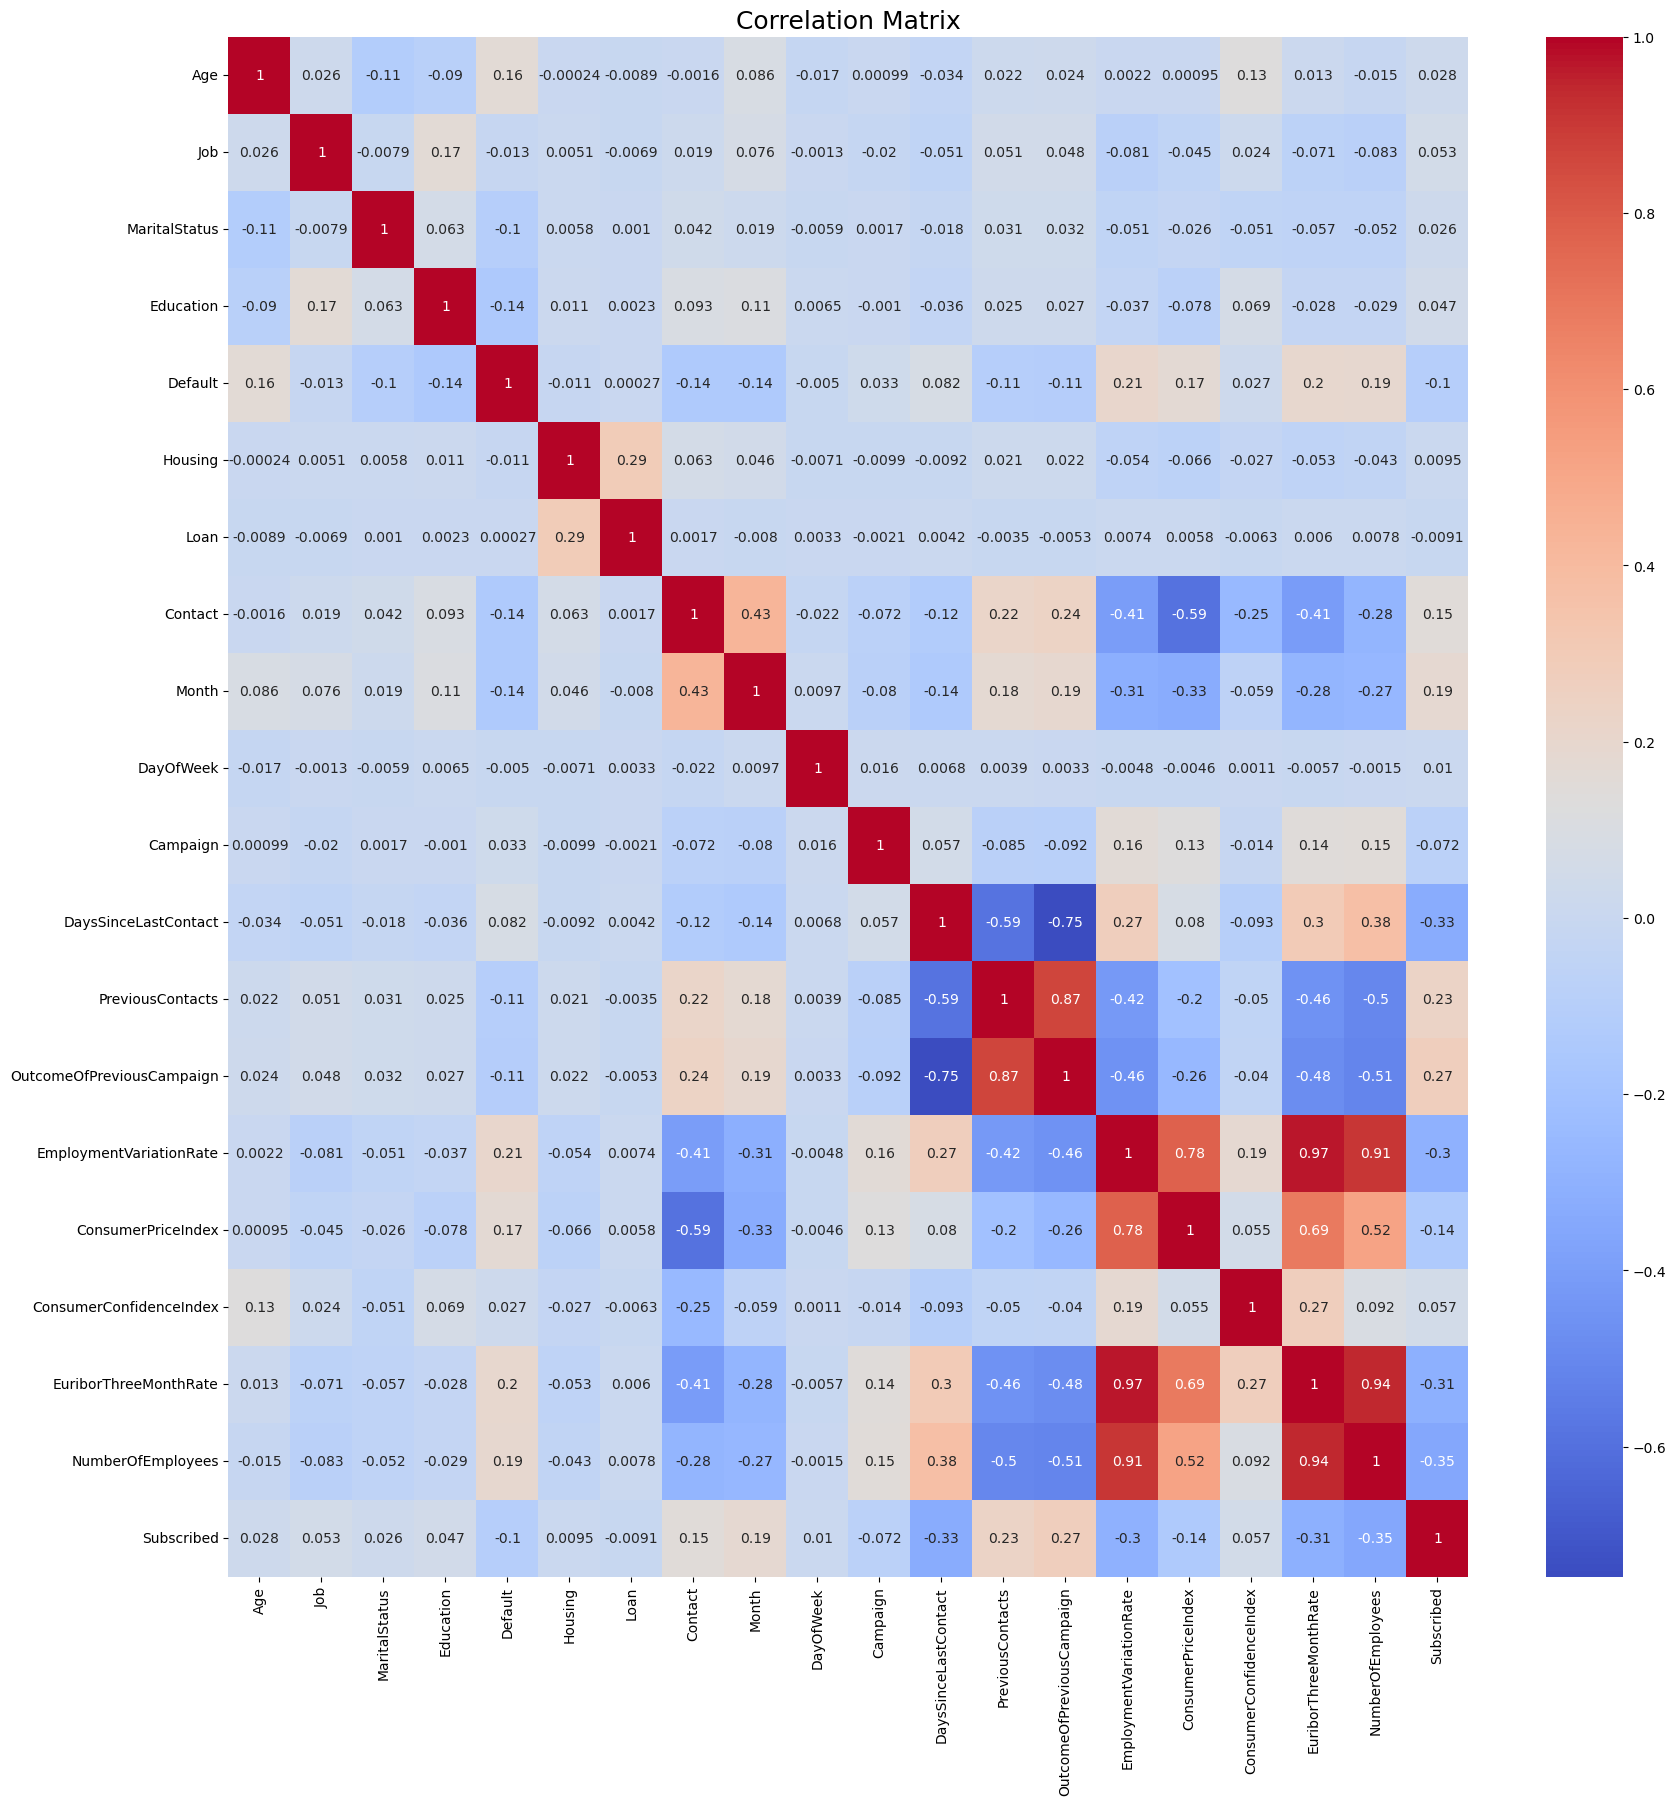

In [26]:
# Correlation matrix
# Convert categorical string values to numeric values before computing correlation
data_numeric = data.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)
plt.figure(figsize=(20, 20))
sns.heatmap(data=data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=18)
plt.savefig('images/05-correlation-matrix.png', bbox_inches='tight', dpi=300)
plt.show()

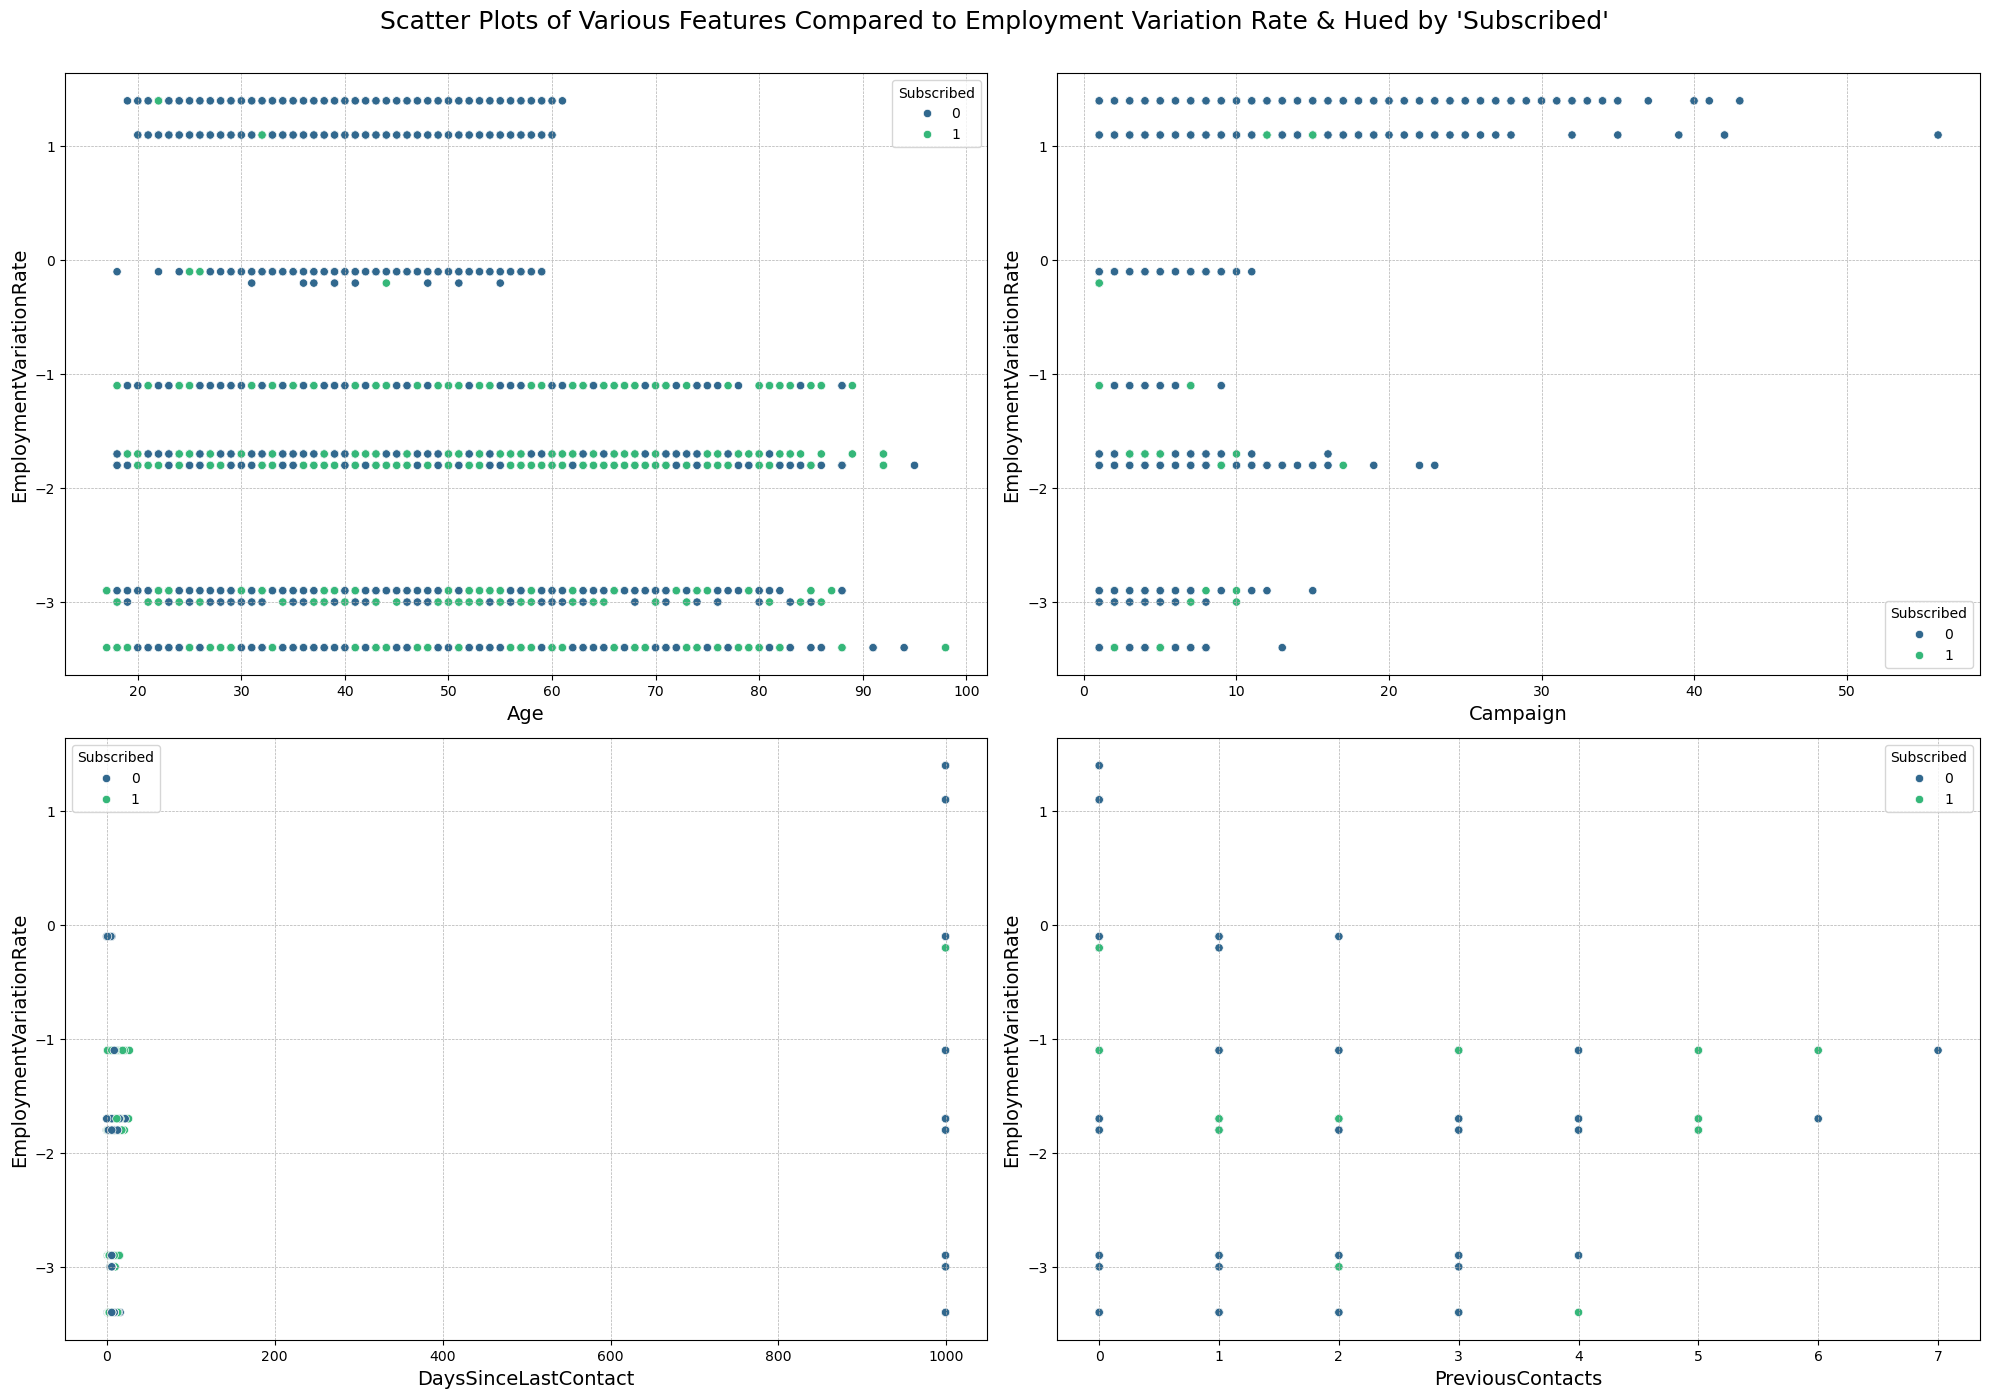

In [27]:
# Some scatter plots of various features compared to employment variation rate & hued on 'Subscribed'
features_to_plot = ['Age', 'Campaign', 'DaysSinceLastContact', 'PreviousContacts']
plt.figure(figsize=(20, 20))
plt.suptitle("Scatter Plots of Various Features Compared to Employment Variation Rate & Hued by 'Subscribed'", fontsize=18, y=1.005)
for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=data_numeric[feature], y=data_numeric['EmploymentVariationRate'], hue=data_numeric['Subscribed'], palette='viridis')
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('EmploymentVariationRate', fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('images/06-scatter-plots-01.png', bbox_inches='tight', dpi=300)
plt.show()

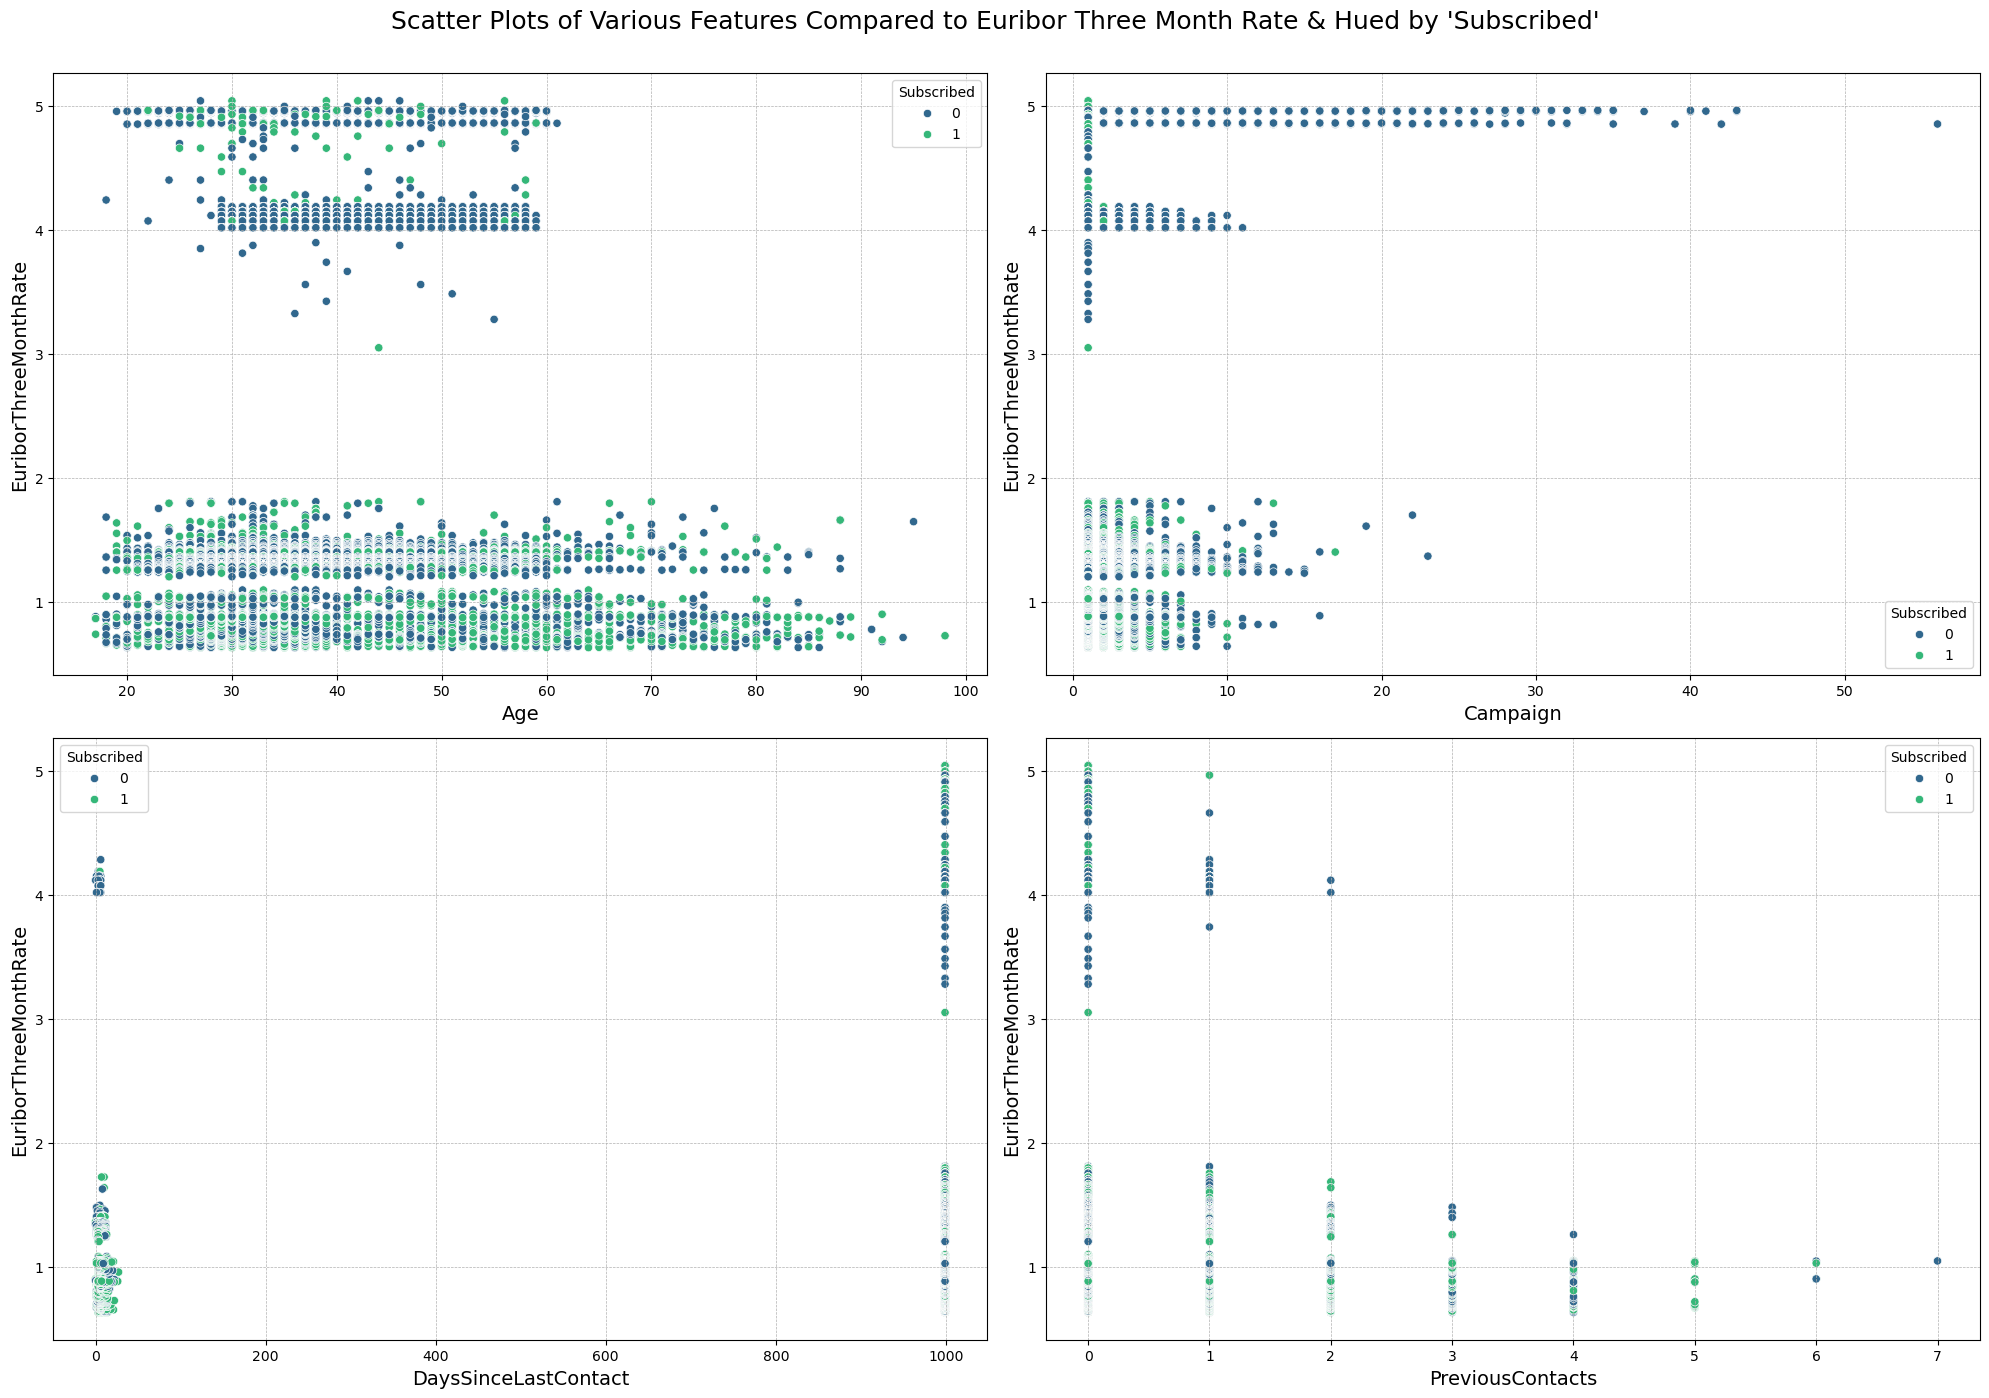

In [28]:
# Some scatter plots of various features compared to Euribor three month rate & hued on 'Subscribed'
features_to_plot = ['Age', 'Campaign', 'DaysSinceLastContact', 'PreviousContacts']
plt.figure(figsize=(20, 20))
plt.suptitle("Scatter Plots of Various Features Compared to Euribor Three Month Rate & Hued by 'Subscribed'", fontsize=18, y=1.005)
for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=data_numeric[feature], y=data_numeric['EuriborThreeMonthRate'], hue=data_numeric['Subscribed'], palette='viridis')
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('EuriborThreeMonthRate', fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('images/07-scatter-plots-02.png', bbox_inches='tight', dpi=300)
plt.show()

##
<div id="problem-3" style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>Problem 3: Understanding the Features</b></h2>
    <p>Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.</p>
<pre style="font-size: 14px;">Input Variables:
    Bank Client Data:
        1 - age (numeric)
        2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
        3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
        4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
        5 - default: has credit in default? (categorical: 'no','yes','unknown')
        6 - housing: has housing loan? (categorical: 'no','yes','unknown')
        7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    Related With the Last Contact of the Current Campaign:
        8 - contact: contact communication type (categorical: 'cellular','telephone')
        9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
        10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
        11 - duration: last contact duration, in seconds (numeric).
        *Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed.
        Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    Other Attributes:
        12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
        13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
        14 - previous: number of contacts performed before this campaign and for this client (numeric)
        15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    Social and Economic Context Attributes:
        16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
        17 - cons.price.idx: consumer price index - monthly indicator (numeric)
        18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
        19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
        20 - nr.employed: number of employees - quarterly indicator (numeric)
Output Variable (Desired Target):
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
</pre>
</div>

<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h4><b>Dataset Analysis</b></h4>
    <ul>
        <li>The dataset initially contained 41,188 entries and now contains 41,176 entries after duplicates were removed.</li>
        <li>The dataset contains 21 columns.</li>
        <li>There are a mix of numeric, categorical, and binary data types across the columns.</li>
        <li>There don't appear to be any missing values.</li>
        <li>Numerical Features: Age, Duration, Campaign, DaysSinceLastContact, PreviousContacts, EmploymentVariationRate, ConsumerPriceIndex, ConsumerConfidenceIndex, EuriborThreeMonthRate, NumberOfEmployees.</li>
        <li>Categorical Features: Job, MaritalStatus, Education, Default, Housing, Loan, Contact, Month, DayOfWeek, OutcomeOfPreviousCampaign, Subscribed.</li>
        <li>All categorical variables will need to be encoded for modeling. Some categorical variables are essentially binary (e.g., `Default`, `Housing`, `Loan`, `Subscribed`), indicating yes/no outcomes. Others, like `Education`, have a natural order and could be treated as ordinal data. Finally, features like `Job`, have no natural order and will need to be one-hot encoded.</li>
        <li>There are a fair number of 'Unknown' values in various columns. These values can be treated as missing data and imputed or dropped as needed.</li>
        <li>The `Subscribed` column is the target variable for predictive modeling, indicating whether a client subscribed to a term deposit. This is a binary outcome and could be modeled as such.</li>
        <li>The target variable is highly unbalanced, with 88.73% of the data being `No` and 11.26% of the data being `Yes`. This imbalance will need to be addressed.</li>
        <li>Features like `Job` and `Education` have high cardinality with many unique values, which might require special consideration during feature encoding for model training.</li>
        <li>Preliminary visualizations suggest the presence of outliers and varied distributions in numerical data, which might need normalization or other preprocessing steps for more effective modeling.</li>
    </ul>
</div>

##
<div id="problem-4" style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>Problem 4: Understanding the Task</b></h2>
    <p>After examining the description and data, your goal now is to clearly state the <b>Business Objective</b> of the task. State the objective below.</p>
</div>

<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <p>The business objective is to predict whether a client will subscribe to a term deposit using the features in the dataset. To make this prediction, various classification models will be trained and evaluated to determine the best performing model for this task.</p>
</div>

##
<div id="problem-5" style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>Problem 5: Engineering Features</b></h2>
    <p>Now that you understand your business objective, we will build a basic model to get started. Before we can do this, we must work to encode the data. Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.</p>
</div>

In [29]:
# Identify and count 'Unknown' values in each categorical feature
unknown_counts = {feature: data[feature][data[feature] == 'Unknown'].count() for feature in categorical_features if 'Unknown' in data[feature].unique()}
unknown_counts

{'Job': 325,
 'MaritalStatus': 79,
 'Education': 1686,
 'Default': 8266,
 'Housing': 980,
 'Loan': 980}

In [30]:
# Get value counts for the 'Default' column
data['Default'].value_counts()

Default
No         31135
Unknown     8266
Yes            3
Name: count, dtype: int64

In [31]:
# Since there are only 3 'yes' values in the 'Default' column, we'll just drop these
data = data.drop(data[data['Default'] == 'Yes'].index)

# Verify
data['Default'].value_counts()

Default
No         31135
Unknown     8266
Name: count, dtype: int64

In [32]:
# Function to prepare data and impute unknowns for a given feature
def impute_unknowns(feature, predictors):
    # Filter rows where the feature is known and unknown
    known = data[data[feature] != 'Unknown']
    unknown = data[data[feature] == 'Unknown']

    # Prepare the training data (features without the target feature and rows with known values)
    X_train = known[predictors]
    y_train = known[feature]

    # Prepare the data where the feature needs to be predicted
    X_unknown = unknown[predictors]

    # Encode categorical data
    X_train_encoded = pd.get_dummies(X_train, drop_first=True)
    X_unknown_encoded = pd.get_dummies(X_unknown, drop_first=True)

    # Ensure the same columns in both datasets (in case of missing columns)
    X_train_encoded, X_unknown_encoded = X_train_encoded.align(X_unknown_encoded, join='left', axis=1, fill_value=0)

    # Train the Decision Tree model
    model = DecisionTreeClassifier(random_state=0)
    model.fit(X_train_encoded, y_train)

    # Predict the 'Unknown' values
    y_unknown_pred = model.predict(X_unknown_encoded)

    # Impute the predicted values back into the original dataframe
    data.loc[data[feature] == 'Unknown', feature] = y_unknown_pred

# List of predictors - using other categorical features and some numerical features
predictors = ['MaritalStatus', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Month', 'DayOfWeek', 'Campaign', 'DaysSinceLastContact', 'PreviousContacts', 'Age']

# Impute 'Unknown' for 'Job' feature
impute_unknowns('Job', predictors)

# Impute 'Unknown' for 'MaritalStatus' feature
impute_unknowns('MaritalStatus', predictors)

# Impute 'Unknown' for 'Education' feature
impute_unknowns('Education', predictors)

# Impute 'Unknown' for 'Housing' feature
impute_unknowns('Housing', predictors)

# Impute 'Unknown' for 'Loan' feature
impute_unknowns('Loan', predictors)

# Verify
unknown_counts = {feature: data[feature][data[feature] == 'Unknown'].count() for feature in categorical_features if 'Unknown' in data[feature].unique()}
pd.DataFrame(unknown_counts, index=['Count']).T

,Count
Default,8266


In [33]:
# Binary encode 'Default', 'Housing', 'Loan' and 'Subscribed' features
data['Default'] = data['Default'].replace({'No': 0, 'Unknown': 1})
data['Housing'] = data['Housing'].replace({'No': 0, 'Yes': 1})
data['Loan'] = data['Loan'].replace({'No': 0, 'Yes': 1})
data['Subscribed'] = data['Subscribed'].replace({'No': 0, 'Yes': 1})

# Verify
data[['Housing', 'Loan', 'Subscribed']].head()

,Housing,Loan,Subscribed
0,0,0,0
1,0,0,0
2,1,0,0
3,0,0,0
4,0,1,0


In [34]:
# Label encoders for 'Education', 'Month', and 'DayOfWeek'
label_encoder_education = LabelEncoder()
label_encoder_month = LabelEncoder()
label_encoder_dayofweek = LabelEncoder()

# Define the ordering for Education
education_order = ['Illiterate', 'Basic 4Y', 'Basic 6Y', 'Basic 9Y', 'High School', 'Professional Course', 'University Degree']
# Fit the encoder based on the defined order
label_encoder_education.fit(education_order)

# Define the ordering for Month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Fit the encoder based on the defined order
label_encoder_month.fit(month_order)

# Define the ordering for DayOfWeek
dayofweek_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Fit the encoder based on the defined order
label_encoder_dayofweek.fit(dayofweek_order)

# Apply label encoding to the 'Education', 'Month', and 'DayOfWeek' features
data['Education'] = label_encoder_education.transform(data['Education'])
data['Month'] = label_encoder_month.transform(data['Month'])
data['DayOfWeek'] = label_encoder_dayofweek.transform(data['DayOfWeek'])

# Verify
data[['Education', 'Month', 'DayOfWeek']].head()

,Education,Month,DayOfWeek
0,0,8,1
1,3,8,1
2,3,8,1
3,1,8,1
4,3,8,1


In [35]:
# Select categorical features for one-hot encoding
categorical_to_encode = [col for col in categorical_features if col not in ['Default', 'Housing', 'Loan', 'Subscribed', 'Education', 'Month', 'DayOfWeek']]

# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_to_encode, drop_first=True)

# Verify
data_encoded.head()

,Age,Education,Default,Housing,Loan,Month,DayOfWeek,Campaign,DaysSinceLastContact,PreviousContacts,...,Job_Self-Employed,Job_Services,Job_Student,Job_Technician,Job_Unemployed,MaritalStatus_Married,MaritalStatus_Single,Contact_Telephone,OutcomeOfPreviousCampaign_Nonexistent,OutcomeOfPreviousCampaign_Success
0,56,0,0,0,0,8,1,1,999,0,...,False,False,False,False,False,True,False,True,True,False
1,57,3,1,0,0,8,1,1,999,0,...,False,True,False,False,False,True,False,True,True,False
2,37,3,0,1,0,8,1,1,999,0,...,False,True,False,False,False,True,False,True,True,False
3,40,1,0,0,0,8,1,1,999,0,...,False,False,False,False,False,True,False,True,True,False
4,56,3,0,0,1,8,1,1,999,0,...,False,True,False,False,False,True,False,True,True,False


In [36]:
# Move 'Subscribed' to the end
cols = data_encoded.columns.tolist()
cols.append(cols.pop(cols.index('Subscribed')))
data_encoded = data_encoded[cols]

# Verify
data_encoded.head()

,Age,Education,Default,Housing,Loan,Month,DayOfWeek,Campaign,DaysSinceLastContact,PreviousContacts,...,Job_Services,Job_Student,Job_Technician,Job_Unemployed,MaritalStatus_Married,MaritalStatus_Single,Contact_Telephone,OutcomeOfPreviousCampaign_Nonexistent,OutcomeOfPreviousCampaign_Success,Subscribed
0,56,0,0,0,0,8,1,1,999,0,...,False,False,False,False,True,False,True,True,False,0
1,57,3,1,0,0,8,1,1,999,0,...,True,False,False,False,True,False,True,True,False,0
2,37,3,0,1,0,8,1,1,999,0,...,True,False,False,False,True,False,True,True,False,0
3,40,1,0,0,0,8,1,1,999,0,...,False,False,False,False,True,False,True,True,False,0
4,56,3,0,0,1,8,1,1,999,0,...,True,False,False,False,True,False,True,True,False,0


In [37]:
# Save cleaned data to a new CSV file
data_encoded.to_csv('data/bank-additional-full-cleaned-02.csv', index=False)

##
<div id="problem-6" style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>Problem 6: Train/Test Split</b></h2>
    <p>With your data prepared, split it into a train and test set.</p>
</div>

In [38]:
# Split the data into train and test sets
X = data_encoded.drop('Subscribed', axis=1)
y = data_encoded['Subscribed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Scale numerical features
scaler = StandardScaler()
features_to_scale = numerical_features
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

In [40]:
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (31520, 30)
y_train Shape: (31520,)
X_test Shape: (7881, 30)
y_test Shape: (7881,)


##
<div id="problem-7" style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>Problem 7: A Baseline Model</b></h2>
    <p>Before we build our first model, we want to establish a baseline. What is the baseline performance that our classifier should aim to beat?</p>
</div>

In [41]:
# A baseline model would simply predict the most frequent class

# Calculate the frequency of each class in the 'Subscribed' column
subscription_counts = data['Subscribed'].value_counts(normalize=True)

# The baseline accuracy is the proportion of the majority class
baseline_accuracy = subscription_counts.max()

baseline_accuracy, subscription_counts

(0.8833024542524301,
 Subscribed
 0    0.883302
 1    0.116698
 Name: proportion, dtype: float64)

<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <p>Our model should have a better accuracy than 88.33%.</p>
</div>

##
<div id="problem-8" style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>Problem 8: A Simple Model</b></h2>
    <p>Use Logistic Regression to build a basic model on your data.</p>
</div>

In [42]:
# Initialize an empty dataframe to store results
model_results = pd.DataFrame(columns=['Model Name', 'Training Time (Seconds)', 'Training Accuracy (%)', 'Test Accuracy (%)'])

In [43]:
# Build logistic regression model
logistic_regression_model = LogisticRegression(random_state=0)

# Start timing the training process
start_time = time.time()

# Fit the model
logistic_regression_model.fit(X_train, y_train)

# Calculate training time
logistic_regression_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = logistic_regression_model.predict(X_train)

# Calculate the training accuracy of the model
logistic_regression_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = logistic_regression_model.predict(X_test)

# Calculate the test accuracy of the model
logistic_regression_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Store the results in model_results
logistic_regression_results_row = {
    'Model Name': 'Logistic Regression',
    'Training Time (Seconds)': round(logistic_regression_training_time, 4),
    'Training Accuracy (%)': round(logistic_regression_training_accuracy, 4),
    'Test Accuracy (%)': round(logistic_regression_test_accuracy, 4)
}
model_results = pd.concat([model_results, pd.DataFrame([logistic_regression_results_row])], ignore_index=True)

print(model_results.tail(1))

            Model Name  Training Time (Seconds)  Training Accuracy (%)  \
0  Logistic Regression                   0.1305                89.7335   

   Test Accuracy (%)  
0             89.481  


##
<div id="problem-9" style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>Problem 9: Score the Model</b></h2>
    <p>What is the accuracy of your model?</p>
</div>

<div style="background-color: #001D3D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h4><b>Logistic Regression Results</b></h4>
    <p>Training Time: 0.1305 seconds</p>
    <p>Training Accuracy: 89.7335%</p>
    <p>Test Accuracy: 89.4810%</p>
</div>

##
<div id="problem-10" style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>Problem 10: Model Comparisons</b></h2>
    <p>Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models. Using the default settings for each of the models, fit and score each. Also, be sure to compare the fit time of each of the models. Present your findings in a <code>DataFrame</code> similar to that below:</p>
    <table>
        <tr>
            <th>Model</th>
            <th>Train Time</th>
            <th>Train Accuracy</th>
            <th>Test Accuracy</th>
        </tr>
        <tr>
            <td>.</td>
            <td>.</td>
            <td>.</td>
            <td>.</td>
        </tr>
    </table>
</div>

In [44]:
# Build KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Start timing the training process
start_time = time.time()

# Fit the model
knn_model.fit(X_train, y_train)

# Calculate training time
knn_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = knn_model.predict(X_train)

# Calculate the training accuracy of the model
knn_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = knn_model.predict(X_test)

# Calculate the test accuracy of the model
knn_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Store the results in model_results
knn_results_row = {
    'Model Name': 'KNN',
    'Training Time (Seconds)': round(knn_training_time, 4),
    'Training Accuracy (%)': round(knn_training_accuracy, 4),
    'Test Accuracy (%)': round(knn_test_accuracy, 4)
}
model_results = pd.concat([model_results, pd.DataFrame([knn_results_row])], ignore_index=True)

print(model_results.tail(1))

  File "d:\Scoop\apps\Mamba\current\envs\datascience\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\Scoop\apps\Mamba\current\envs\datascience\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Scoop\apps\Mamba\current\envs\datascience\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\Scoop\apps\Mamba\current\envs\datascience\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


  Model Name  Training Time (Seconds)  Training Accuracy (%)  \
1        KNN                   0.0081                90.9803   

   Test Accuracy (%)  
1            88.6182  


In [45]:
# Build Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=0)

# Start timing the training process
start_time = time.time()

# Fit the model
decision_tree_model.fit(X_train, y_train)

# Calculate training time
decision_tree_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = decision_tree_model.predict(X_train)

# Calculate the training accuracy of the model
decision_tree_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = decision_tree_model.predict(X_test)

# Calculate the test accuracy of the model
decision_tree_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Store the results in model_results
decision_tree_results_row = {
    'Model Name': 'Decision Tree',
    'Training Time (Seconds)': round(decision_tree_training_time, 4),
    'Training Accuracy (%)': round(decision_tree_training_accuracy, 4),
    'Test Accuracy (%)': round(decision_tree_test_accuracy, 4)
}
model_results = pd.concat([model_results, pd.DataFrame([decision_tree_results_row])], ignore_index=True)

print(model_results.tail(1))

      Model Name  Training Time (Seconds)  Training Accuracy (%)  \
2  Decision Tree                   0.1275                99.4924   

   Test Accuracy (%)  
2            83.0225  


In [46]:
# Build Random Forest model
random_forest_model = RandomForestClassifier(random_state=0)

# Start timing the training process
start_time = time.time()

# Fit the model
random_forest_model.fit(X_train, y_train)

# Calculate training time
random_forest_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = random_forest_model.predict(X_train)

# Calculate the training accuracy of the model
random_forest_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = random_forest_model.predict(X_test)

# Calculate the test accuracy of the model
random_forest_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Store the results in model_results
random_forest_results_row = {
    'Model Name': 'Random Forest',
    'Training Time (Seconds)': round(random_forest_training_time, 4),
    'Training Accuracy (%)': round(random_forest_training_accuracy, 4),
    'Test Accuracy (%)': round(random_forest_test_accuracy, 4)
}
model_results = pd.concat([model_results, pd.DataFrame([random_forest_results_row])], ignore_index=True)

print(model_results.tail(1))

      Model Name  Training Time (Seconds)  Training Accuracy (%)  \
3  Random Forest                   2.0807                99.4892   

   Test Accuracy (%)  
3            88.4786  


In [47]:
# Build SVM model
svm_model = SVC(random_state=0)

# Start timing the training process
start_time = time.time()

# Fit the model
svm_model.fit(X_train, y_train)

# Calculate training time
svm_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = svm_model.predict(X_train)

# Calculate the training accuracy of the model
svm_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = svm_model.predict(X_test)

# Calculate the test accuracy of the model
svm_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Store the results in model_results
svm_results_row = {
    'Model Name': 'SVM',
    'Training Time (Seconds)': round(svm_training_time, 4),
    'Training Accuracy (%)': round(svm_training_accuracy, 4),
    'Test Accuracy (%)': round(svm_test_accuracy, 4)
}
model_results = pd.concat([model_results, pd.DataFrame([svm_results_row])], ignore_index=True)

print(model_results.tail(1))

  Model Name  Training Time (Seconds)  Training Accuracy (%)  \
4        SVM                  29.6407                89.6796   

   Test Accuracy (%)  
4            89.3288  


In [48]:
model_results

,Model Name,Training Time (Seconds),Training Accuracy (%),Test Accuracy (%)
0,Logistic Regression,0.1305,89.7335,89.4810
1,KNN,0.0081,90.9803,88.6182
2,Decision Tree,0.1275,99.4924,83.0225
3,Random Forest,2.0807,99.4892,88.4786
4,SVM,29.6407,89.6796,89.3288


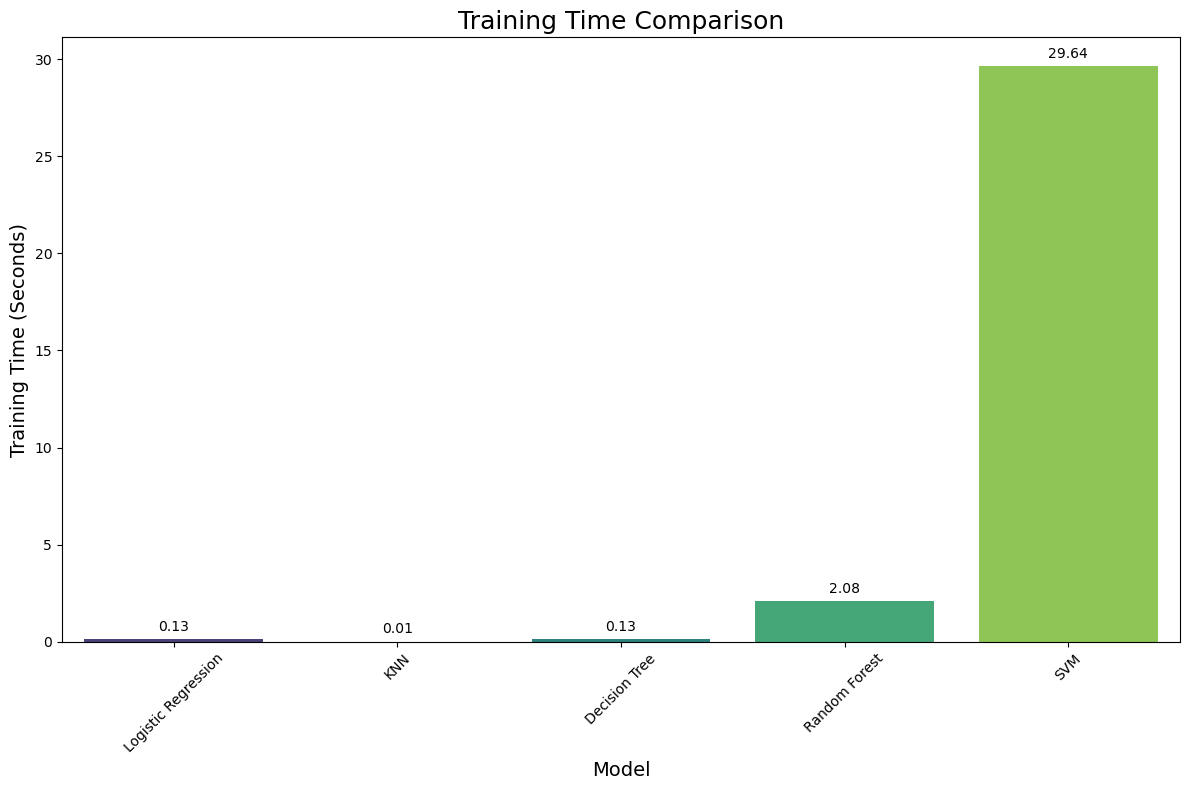

In [49]:
# Training Time Comparison
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Model Name', y='Training Time (Seconds)', data=model_results, palette="viridis")
plt.title('Training Time Comparison', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Training Time (Seconds)', fontsize=14)
plt.xticks(rotation=45)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.savefig('images/08-training-time-comparison.png', bbox_inches='tight', dpi=300)
plt.show()

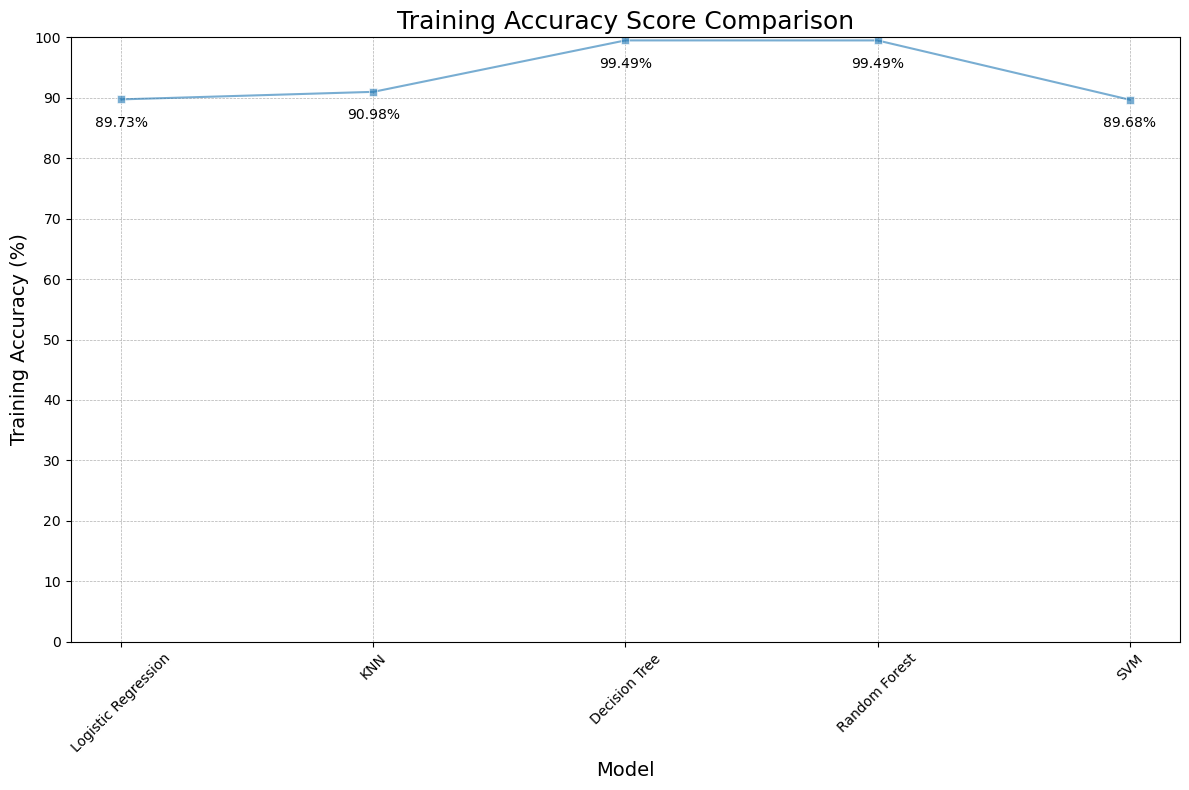

In [50]:
# Training Accuracy Score Comparison
plt.figure(figsize=(12, 8))
line = sns.lineplot(x='Model Name', y='Training Accuracy (%)', data=model_results, palette="viridis", marker="s", alpha=0.6)
plt.title('Training Accuracy Score Comparison', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Training Accuracy (%)', fontsize=14)
plt.yticks(np.arange(0, 101, 10))
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
for x, y in zip(range(len(model_results['Model Name'])), model_results['Training Accuracy (%)']):
    plt.text(x, y - 5, f'{y:.2f}%', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('images/09-training-accuracy-score-comparison.png', bbox_inches='tight', dpi=300)
plt.show()

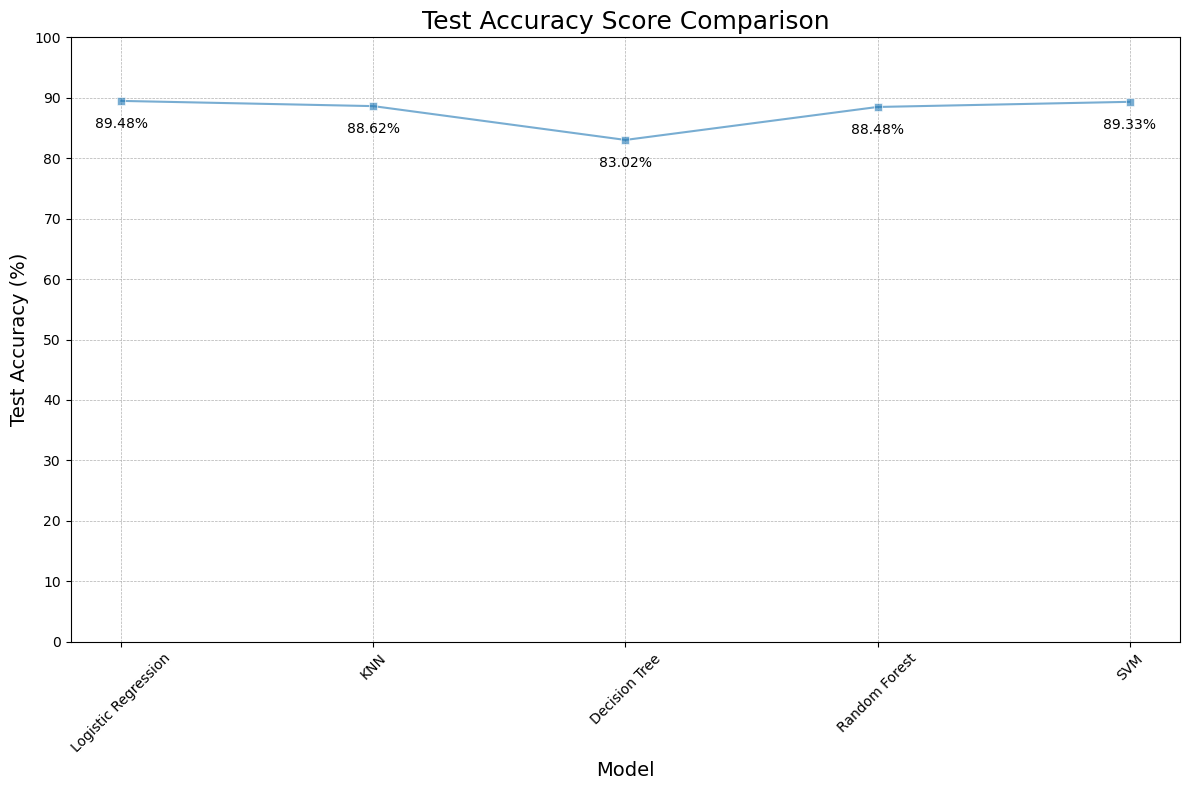

In [51]:
# Test Accuracy Score Comparison
plt.figure(figsize=(12, 8))
line = sns.lineplot(x='Model Name', y='Test Accuracy (%)', data=model_results, palette="viridis", marker="s", alpha=0.6)
plt.title('Test Accuracy Score Comparison', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Test Accuracy (%)', fontsize=14)
plt.yticks(np.arange(0, 101, 10))
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
for x, y in zip(range(len(model_results['Model Name'])), model_results['Test Accuracy (%)']):
    plt.text(x, y - 5, f'{y:.2f}%', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('images/10-test-accuracy-score-comparison.png', bbox_inches='tight', dpi=300)
plt.show()

##
<div id="problem-11" style="background-color: #0D0C1D; border-radius: 8px; box-sizing: border-box; color: #E0E1DD; font-family: 'Ubuntu Mono', Consolas; padding: 20px 30px 10px 30px;">
    <h2><b>Problem 11: Improving the Model</b></h2>
    <p>Now that we have some basic models on the board, we want to try to improve these. Below, we list a few things to explore in this pursuit.</p>
    <ul>
        <li>More Feature Engineering and Exploration: For example, should we keep the gender feature? Why or why not?</li>
        <li>Hyperparameter Tuning and Grid Search: All of our models have additional hyperparameters to tune and explore. For example the number of neighbors in KNN or the maximum depth of a Decision Tree.</li>
        <li>Adjust your performance metric.</li>
    </ul>
</div>

In [52]:
# Initialize an empty dataframe to store results
optimized_model_results = pd.DataFrame(columns=['Model Name', 'Training Time (Seconds)', 'Training Score', 'Training Accuracy (%)', 'Test Score', 'Test Accuracy (%)', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

In [53]:
# Build optimized logistic regression model
logistic_regression_optimized_parameters = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

logistic_regression_optimized_model = GridSearchCV(LogisticRegression(random_state=0), logistic_regression_optimized_parameters, cv=5, n_jobs=-1)

# Start timing the training process
start_time = time.time()

# Fit the model
logistic_regression_optimized_model.fit(X_train, y_train)

# Calculate training time
logistic_regression_optimized_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = logistic_regression_optimized_model.predict(X_train)

# Calculate the training accuracy of the model
logistic_regression_optimized_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = logistic_regression_optimized_model.predict(X_test)

# Calculate the test accuracy of the model
logistic_regression_optimized_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Calculate precision, recall and f1 score
logistic_regression_optimized_precision = precision_score(y_test, y_pred)
logistic_regression_optimized_recall = recall_score(y_test, y_pred)
logistic_regression_optimized_f1_score = f1_score(y_test, y_pred)

# Calculate ROC AUC
logistic_regression_optimized_roc_auc = roc_auc_score(y_test, y_pred)

# Store the results in optimized_model_results
logistic_regression_optimized_results_row = {
    'Model Name': 'Logistic Regression',
    'Training Time (Seconds)': round(logistic_regression_optimized_training_time, 4),
    'Training Score': logistic_regression_optimized_model.best_score_,
    'Training Accuracy (%)': round(logistic_regression_optimized_training_accuracy, 4),
    'Test Score': logistic_regression_optimized_model.score(X_test, y_test),
    'Test Accuracy (%)': round(logistic_regression_optimized_test_accuracy, 4),
    'Precision': round(logistic_regression_optimized_precision, 4),
    'Recall': round(logistic_regression_optimized_recall, 4),
    'F1 Score': round(logistic_regression_optimized_f1_score, 4),
    'ROC AUC': round(logistic_regression_optimized_roc_auc, 4)
}
optimized_model_results = pd.concat([optimized_model_results, pd.DataFrame([logistic_regression_optimized_results_row])], ignore_index=True)

# Print best parameters
print(f'Best Parameters for Logistic Regression: {logistic_regression_optimized_model.best_params_}')

# Print results
print(optimized_model_results.tail(1))

Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
            Model Name  Training Time (Seconds)  Training Score  \
0  Logistic Regression                   3.4407        0.896954   

   Training Accuracy (%)  Test Score  Test Accuracy (%)  Precision  Recall  \
0                89.7557    0.895064            89.5064      0.613    0.22   

   F1 Score  ROC AUC  
0    0.3238    0.601  


In [54]:
# Build optimized KNN model
knn_optimized_parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_optimized_random_search = RandomizedSearchCV(KNeighborsClassifier(), knn_optimized_parameters, n_iter=100, cv=5, n_jobs=-1, random_state=0)

# Start timing the training process
start_time = time.time()

# Fit the model
knn_optimized_random_search.fit(X_train, y_train)

# Calculate training time
knn_optimized_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = knn_optimized_random_search.predict(X_train)

# Calculate the training accuracy of the model
knn_optimized_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = knn_optimized_random_search.predict(X_test)

# Calculate the test accuracy of the model
knn_optimized_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Calculate precision, recall and f1 score
knn_optimized_precision = precision_score(y_test, y_pred)
knn_optimized_recall = recall_score(y_test, y_pred)
knn_optimized_f1_score = f1_score(y_test, y_pred)

# Calculate ROC AUC
knn_optimized_roc_auc = roc_auc_score(y_test, y_pred)

# Store the results in optimized_model_results
knn_optimized_results_row = {
    'Model Name': 'KNN',
    'Training Time (Seconds)': round(knn_optimized_training_time, 4),
    'Training Score': knn_optimized_random_search.best_score_,
    'Training Accuracy (%)': round(knn_optimized_training_accuracy, 4),
    'Test Score': knn_optimized_random_search.score(X_test, y_test),
    'Test Accuracy (%)': round(knn_optimized_test_accuracy, 4),
    'Precision': knn_optimized_precision,
    'Recall': knn_optimized_recall,
    'F1 Score': knn_optimized_f1_score,
    'ROC AUC': knn_optimized_roc_auc
}
optimized_model_results = pd.concat([optimized_model_results, pd.DataFrame([knn_optimized_results_row])], ignore_index=True)

# Print best parameters
print(f'Best Parameters for KNN: {knn_optimized_random_search.best_params_}')

# Print results
print(optimized_model_results.tail(1))

Best Parameters for KNN: {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'manhattan'}
  Model Name  Training Time (Seconds)  Training Score  Training Accuracy (%)  \
1        KNN                  15.1092        0.893147                90.3966   

   Test Score  Test Accuracy (%)  Precision    Recall  F1 Score   ROC AUC  
1    0.889989            88.9989   0.535792  0.274444  0.362968  0.621895  


In [55]:
# Build optimized decision tree model
decision_tree_optimized_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree_optimized_model = GridSearchCV(DecisionTreeClassifier(random_state=0), decision_tree_optimized_parameters, cv=5)

# Start timing the training process
start_time = time.time()

# Fit the model
decision_tree_optimized_model.fit(X_train, y_train)

# Calculate training time
decision_tree_optimized_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = decision_tree_optimized_model.predict(X_train)

# Calculate the training accuracy of the model
decision_tree_optimized_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = decision_tree_optimized_model.predict(X_test)

# Calculate the test accuracy of the model
decision_tree_optimized_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Calculate precision, recall and f1 score
decision_tree_optimized_precision = precision_score(y_test, y_pred)
decision_tree_optimized_recall = recall_score(y_test, y_pred)
decision_tree_optimized_f1_score = f1_score(y_test, y_pred)

# Calculate ROC AUC
decision_tree_optimized_roc_auc = roc_auc_score(y_test, y_pred)

# Store the results in optimized_model_results
decision_tree_optimized_results_row = {
    'Model Name': 'Decision Tree',
    'Training Time (Seconds)': round(decision_tree_optimized_training_time, 4),
    'Training Score': decision_tree_optimized_model.best_score_,
    'Training Accuracy (%)': round(decision_tree_optimized_training_accuracy, 4),
    'Test Score': decision_tree_optimized_model.score(X_test, y_test),
    'Test Accuracy (%)': round(decision_tree_optimized_test_accuracy, 4),
    'Precision': decision_tree_optimized_precision,
    'Recall': decision_tree_optimized_recall,
    'F1 Score': decision_tree_optimized_f1_score,
    'ROC AUC': decision_tree_optimized_roc_auc
}
optimized_model_results = pd.concat([optimized_model_results, pd.DataFrame([decision_tree_optimized_results_row])], ignore_index=True)

# Print best parameters
print(f'Best Parameters for Decision Tree: {decision_tree_optimized_model.best_params_}')

# Print results
print(optimized_model_results.tail(1))

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
      Model Name  Training Time (Seconds)  Training Score  \
2  Decision Tree                  33.5881        0.896193   

   Training Accuracy (%)  Test Score  Test Accuracy (%)  Precision    Recall  \
2                90.0222    0.897094            89.7094   0.610422  0.273333   

   F1 Score   ROC AUC  
2   0.37759  0.625422  


In [56]:
# Build optimized random forest model
random_forest_optimized_parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest_optimized_model = RandomizedSearchCV(RandomForestClassifier(random_state=0), random_forest_optimized_parameters, n_iter=100, cv=5, n_jobs=-1, random_state=0)

# Start timing the training process
start_time = time.time()

# Fit the model
random_forest_optimized_model.fit(X_train, y_train)

# Calculate training time
random_forest_optimized_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = random_forest_optimized_model.predict(X_train)

# Calculate the training accuracy of the model
random_forest_optimized_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = random_forest_optimized_model.predict(X_test)

# Calculate the test accuracy of the model
random_forest_optimized_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Calculate precision, recall and f1 score
random_forest_optimized_precision = precision_score(y_test, y_pred)
random_forest_optimized_recall = recall_score(y_test, y_pred)
random_forest_optimized_f1_score = f1_score(y_test, y_pred)

# Calculate ROC AUC
random_forest_optimized_roc_auc = roc_auc_score(y_test, y_pred)

# Store the results in optimized_model_results
random_forest_optimized_results_row = {
    'Model Name': 'Random Forest',
    'Training Time (Seconds)': round(random_forest_optimized_training_time, 4),
    'Training Score': random_forest_optimized_model.best_score_,
    'Training Accuracy (%)': round(random_forest_optimized_training_accuracy, 4),
    'Test Score': random_forest_optimized_model.score(X_test, y_test),
    'Test Accuracy (%)': round(random_forest_optimized_test_accuracy, 4),
    'Precision': random_forest_optimized_precision,
    'Recall': random_forest_optimized_recall,
    'F1 Score': random_forest_optimized_f1_score,
    'ROC AUC': random_forest_optimized_roc_auc
}
optimized_model_results = pd.concat([optimized_model_results, pd.DataFrame([random_forest_optimized_results_row])], ignore_index=True)

# Print best parameters
print(f'Best Parameters for Random Forest: {random_forest_optimized_model.best_params_}')

# Print results
print(optimized_model_results.tail(1))

Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
      Model Name  Training Time (Seconds)  Training Score  \
3  Random Forest                 138.7228        0.898287   

   Training Accuracy (%)  Test Score  Test Accuracy (%)  Precision    Recall  \
3                91.1612    0.895191            89.5191   0.605114  0.236667   

   F1 Score   ROC AUC  
3  0.340256  0.608378  


In [57]:
# Build optimized SVM model
svm_optimized_parameters = {
    'kernel': ['rbf'],
    'C': [0.1]
}

svm_optimized_model = GridSearchCV(SVC(random_state=0), svm_optimized_parameters, cv=5, n_jobs=-1)

# Start timing the training process
start_time = time.time()

# Fit the model
svm_optimized_model.fit(X_train, y_train)

# Calculate training time
svm_optimized_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = svm_optimized_model.predict(X_train)

# Calculate the training accuracy of the model
svm_optimized_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = svm_optimized_model.predict(X_test)

# Calculate the test accuracy of the model
svm_optimized_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Calculate precision, recall and f1 score
svm_optimized_precision = precision_score(y_test, y_pred)
svm_optimized_recall = recall_score(y_test, y_pred)
svm_optimized_f1_score = f1_score(y_test, y_pred)

# Calculate ROC AUC
svm_optimized_roc_auc = roc_auc_score(y_test, y_pred)

# Store the results in optimized_model_results
svm_optimized_results_row = {
    'Model Name': 'SVM',
    'Training Time (Seconds)': round(svm_optimized_training_time, 4),
    'Training Score': svm_optimized_model.best_score_,
    'Training Accuracy (%)': round(svm_optimized_training_accuracy, 4),
    'Test Score': svm_optimized_model.score(X_test, y_test),
    'Test Accuracy (%)': round(svm_optimized_test_accuracy, 4),
    'Precision': svm_optimized_precision,
    'Recall': svm_optimized_recall,
    'F1 Score': svm_optimized_f1_score,
    'ROC AUC': svm_optimized_roc_auc
}
optimized_model_results = pd.concat([optimized_model_results, pd.DataFrame([svm_optimized_results_row])], ignore_index=True)

# Print best parameters
print(f'Best Parameters for SVM: {svm_optimized_model.best_params_}')

# Print results
print(optimized_model_results.tail(1))

Best Parameters for SVM: {'C': 0.1, 'kernel': 'rbf'}
  Model Name  Training Time (Seconds)  Training Score  Training Accuracy (%)  \
4        SVM                  26.0042        0.894956                89.4956   

   Test Score  Test Accuracy (%)  Precision    Recall  F1 Score   ROC AUC  
4    0.889989            88.9989   0.552716  0.192222  0.285243  0.586084  


In [58]:
optimized_model_results

,Model Name,Training Time (Seconds),Training Score,Training Accuracy (%),Test Score,Test Accuracy (%),Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,3.4407,0.896954,89.7557,0.895064,89.5064,0.613000,0.220000,0.323800,0.601000
1,KNN,15.1092,0.893147,90.3966,0.889989,88.9989,0.535792,0.274444,0.362968,0.621895
2,Decision Tree,33.5881,0.896193,90.0222,0.897094,89.7094,0.610422,0.273333,0.377590,0.625422
3,Random Forest,138.7228,0.898287,91.1612,0.895191,89.5191,0.605114,0.236667,0.340256,0.608378
4,SVM,26.0042,0.894956,89.4956,0.889989,88.9989,0.552716,0.192222,0.285243,0.586084


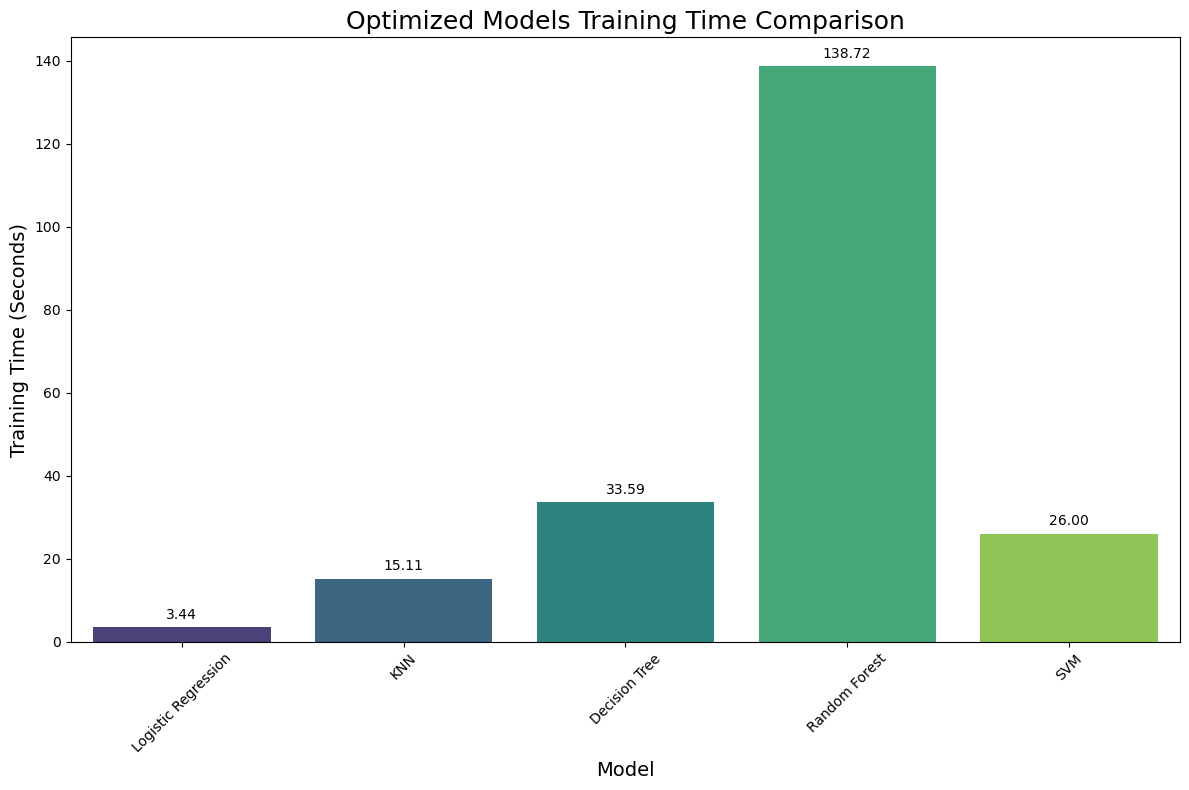

In [59]:
# Optimized Models Training Time Comparison
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Model Name', y='Training Time (Seconds)', data=optimized_model_results, palette="viridis")
plt.title('Optimized Models Training Time Comparison', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Training Time (Seconds)', fontsize=14)
plt.xticks(rotation=45)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.savefig('images/11-optimized-models-training-time-comparison.png', bbox_inches='tight', dpi=300)
plt.show()

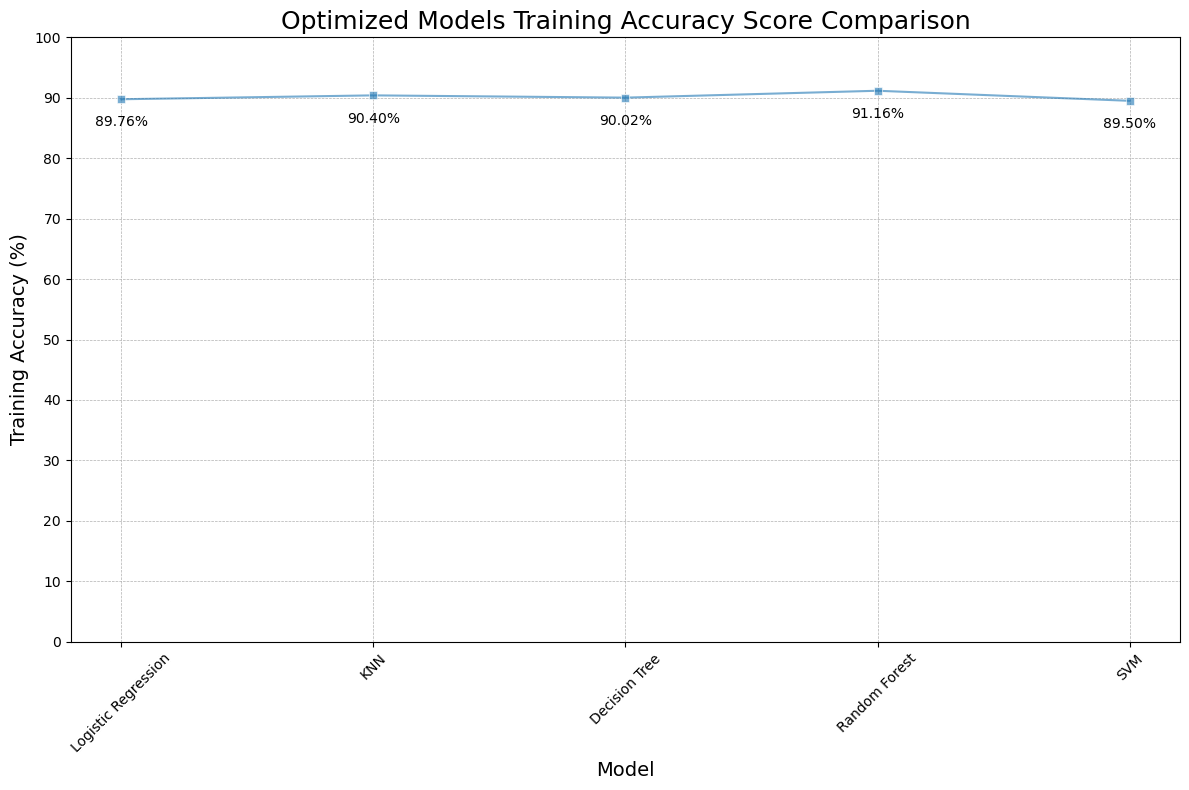

In [60]:
# Optimized Models Training Accuracy Score Comparison
plt.figure(figsize=(12, 8))
line = sns.lineplot(x='Model Name', y='Training Accuracy (%)', data=optimized_model_results, palette="viridis", marker="s", alpha=0.6)
plt.title('Optimized Models Training Accuracy Score Comparison', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Training Accuracy (%)', fontsize=14)
plt.yticks(np.arange(0, 101, 10))
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
for x, y in zip(range(len(optimized_model_results['Model Name'])), optimized_model_results['Training Accuracy (%)']):
    plt.text(x, y - 5, f'{y:.2f}%', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('images/12-optimized-models-training-accuracy-score-comparison.png', bbox_inches='tight', dpi=300)
plt.show()

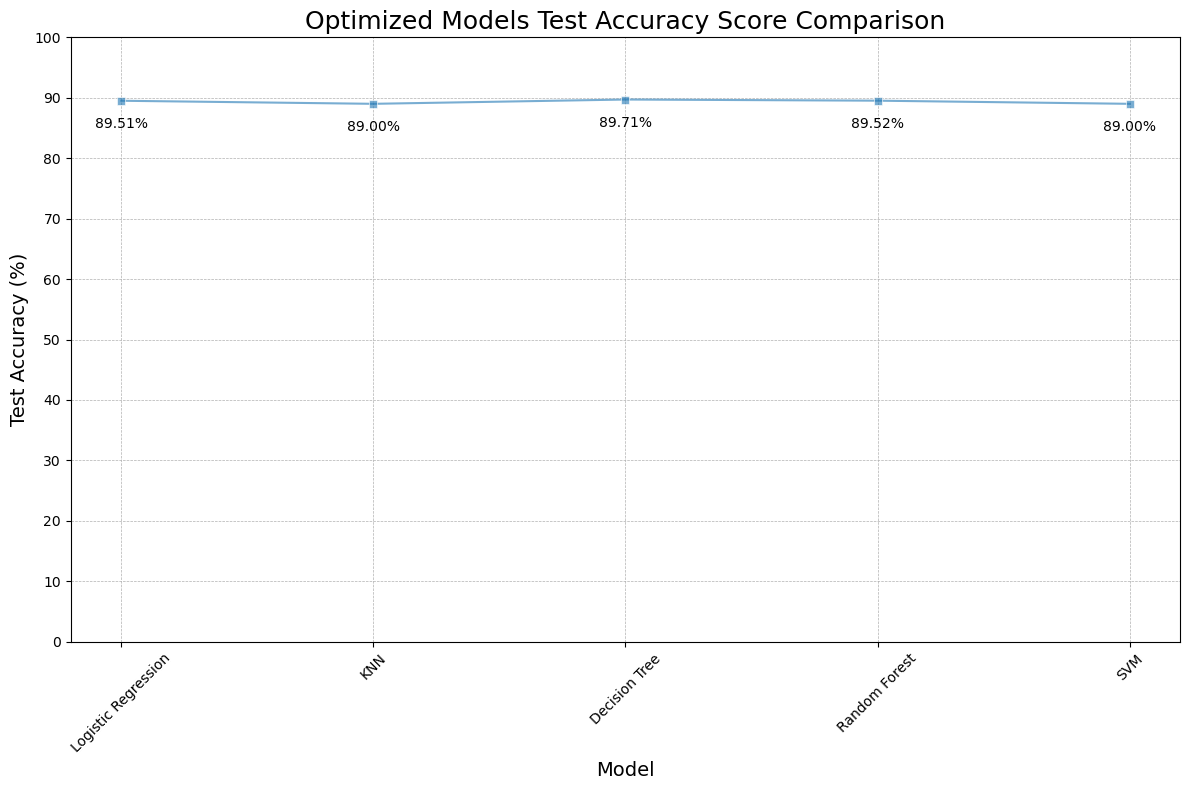

In [61]:
# Optimized Models Test Accuracy Score Comparison
plt.figure(figsize=(12, 8))
line = sns.lineplot(x='Model Name', y='Test Accuracy (%)', data=optimized_model_results, palette="viridis", marker="s", alpha=0.6)
plt.title('Optimized Models Test Accuracy Score Comparison', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Test Accuracy (%)', fontsize=14)
plt.yticks(np.arange(0, 101, 10))
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
for x, y in zip(range(len(optimized_model_results['Model Name'])), optimized_model_results['Test Accuracy (%)']):
    plt.text(x, y - 5, f'{y:.2f}%', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('images/13-optimized-models-test-accuracy-score-comparison.png', bbox_inches='tight', dpi=300)
plt.show()

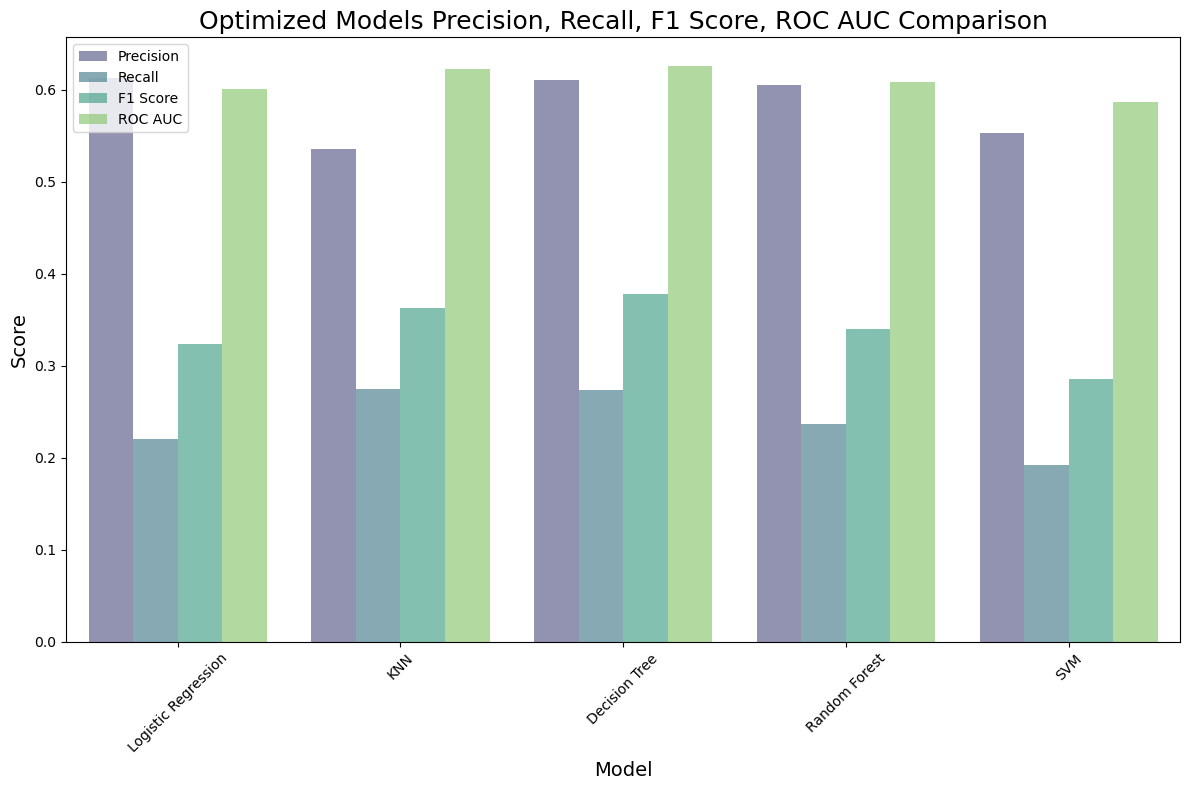

In [62]:
# Optimized Models Precision, Recall, F1 Score, ROC AUC Comparison
plt.figure(figsize=(12, 8))

melted_df = optimized_model_results.melt(id_vars="Model Name", value_vars=["Precision", "Recall", "F1 Score", "ROC AUC"], var_name="Metric", value_name="Score")

barplot = sns.barplot(x='Model Name', y='Score', hue='Metric', data=melted_df, palette="viridis", alpha=0.6)

plt.title('Optimized Models Precision, Recall, F1 Score, ROC AUC Comparison', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('images/14-optimized-models-precision-recall-f1-score-roc-auc-comparison.png', bbox_inches='tight', dpi=300)
plt.show()

In [63]:
# Calculate feature importances for best-performing model (optimized decision tree)
features = []
importances = []
best_model = decision_tree_optimized_model.best_estimator_
feature_importances = best_model.feature_importances_
for name, importance in zip(X, feature_importances):
    features.append(name)
    importances.append(round(importance * 100, 2))

features = pd.DataFrame({'Features': features, 'Importance (%)': importances})
features.sort_values(by='Importance (%)', ascending=False)

,Features,Importance (%)
14,NumberOfEmployees,64.12
8,DaysSinceLastContact,13.85
12,ConsumerConfidenceIndex,5.96
13,EuriborThreeMonthRate,5.07
5,Month,2.82
6,DayOfWeek,2.57
27,Contact_Telephone,2.18
11,ConsumerPriceIndex,1.45
28,OutcomeOfPreviousCampaign_Nonexistent,1.09
0,Age,0.73


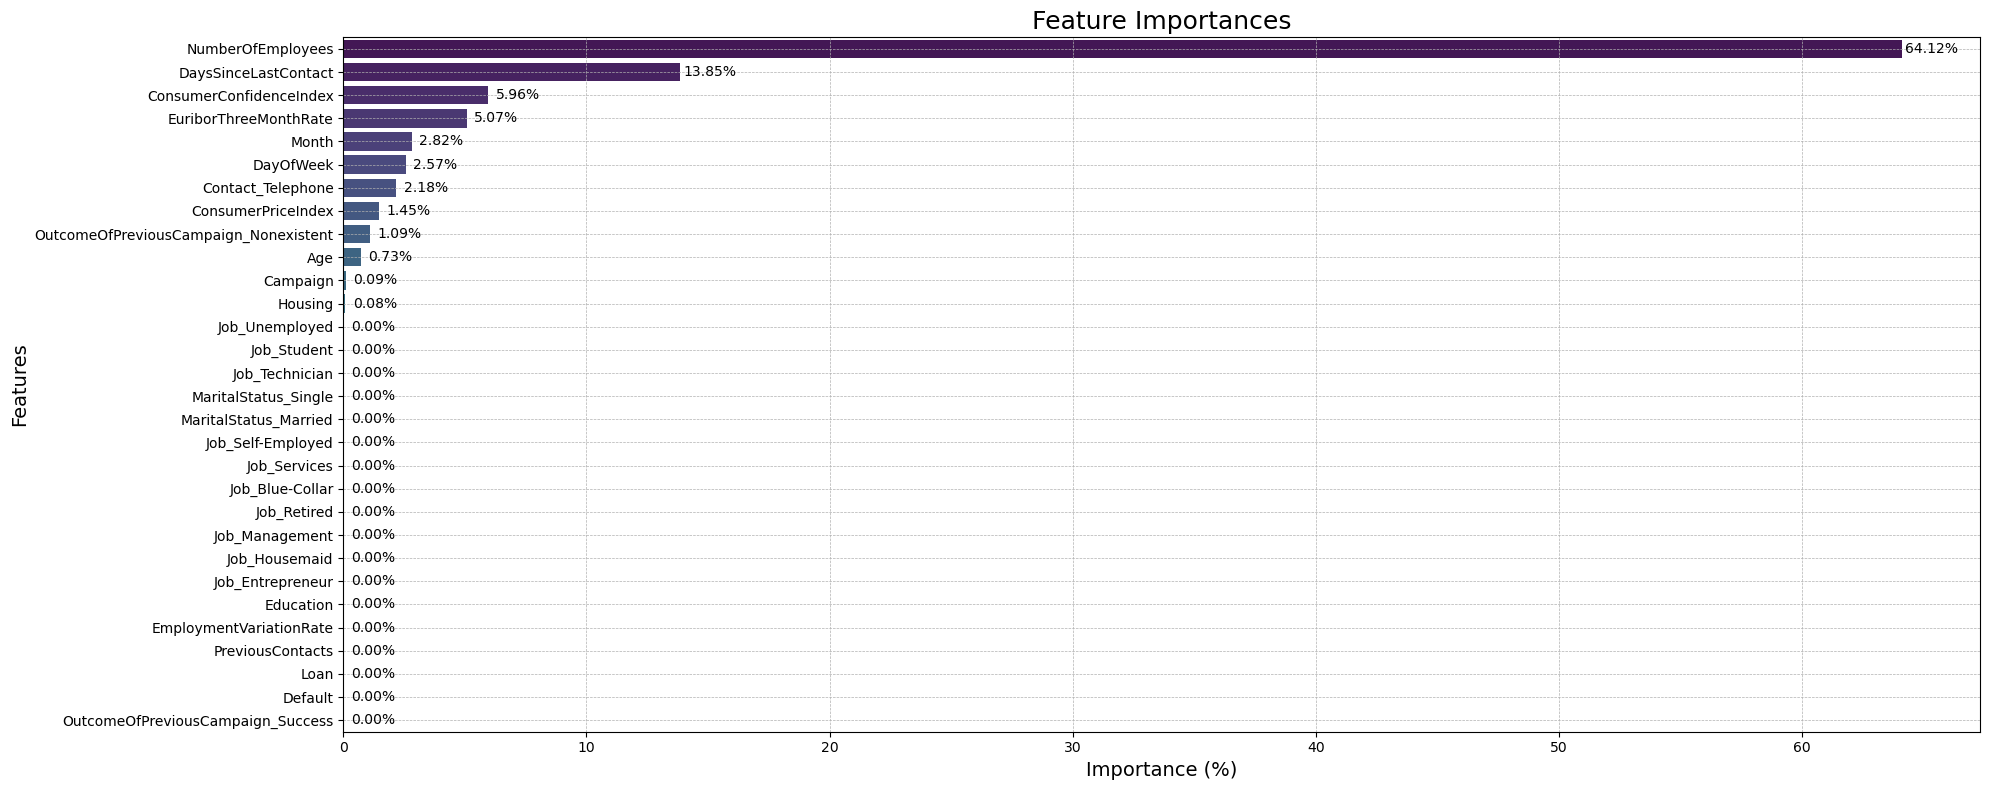

In [64]:
# Plot feature importances
plt.figure(figsize=(20, 8))
# Sorting the features dataframe by 'Importance (%)' in descending order before plotting
features_sorted = features.sort_values(by='Importance (%)', ascending=False)
barplot = sns.barplot(x='Importance (%)', y='Features', data=features_sorted, palette="viridis")
plt.title('Feature Importances', fontsize=18)
plt.xlabel('Importance (%)', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
for p in barplot.patches:
    barplot.annotate(f"{format(p.get_width(), '.2f')}%", (p.get_width() + 0.70, p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(9, 0), textcoords='offset points')
plt.tight_layout()
plt.savefig('images/15-feature-importances.png', bbox_inches='tight', dpi=300)
plt.show()